Making Hadoop/Spark Sensible for the Demo
Using Hadoop and Spark for a 1.8 MB dataset is overkill for production but works for a demo if framed as a scalable prototype:

Educational purpose: Demonstrates big data tools (Hadoop for distributed storage, Spark for distributed ML) used in real-world scenarios like banking, where datasets can reach terabytes.
Scalability narrative: Shows a pipeline ready for large-scale data (e.g., millions of loan records), using a small dataset for demo simplicity and speed.


Installing the java 8 (JDK) because its the backbone for the hadoop system

In [136]:
# Install Java quietly
!apt-get install -y openjdk-8-jdk-headless > /dev/null

# Detect Java path dynamically
import os
import subprocess

# Find the Java executable path
java_path = subprocess.check_output(["readlink", "-f", "/usr/bin/java"]).decode().strip()

# Set JAVA_HOME to the parent directory of the Java executable
os.environ["JAVA_HOME"] = os.path.dirname(os.path.dirname(java_path))

# Verify
!java -version
print("JAVA_HOME is set to:", os.environ["JAVA_HOME"])

openjdk version "11.0.28" 2025-07-15
OpenJDK Runtime Environment (build 11.0.28+6-post-Ubuntu-1ubuntu122.04.1)
OpenJDK 64-Bit Server VM (build 11.0.28+6-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)
JAVA_HOME is set to: /usr/lib/jvm/java-11-openjdk-amd64


Downlooooading hadoop 3.3.6 version



In [137]:
import os

# Check if the file already exists
if not os.path.exists("hadoop-3.3.6.tar.gz"):
    # Download the Hadoop tarball
    !wget https://downloads.apache.org/hadoop/common/hadoop-3.3.6/hadoop-3.3.6.tar.gz
else:
    print("Hadoop tarball already exists. Skipping download.")


Hadoop tarball already exists. Skipping download.


Now the downloooooooaded hadoop 3.3.6 should get extracted in order to use hadoop system

In [138]:
import os

# Extract Hadoop only if not already extracted
if not os.path.exists("hadoop-3.3.6"):
    !tar -xzf hadoop-3.3.6.tar.gz
    print("Hadoop extracted successfully.")
else:
    print("Hadoop folder already exists. Skipping extraction.")

Hadoop folder already exists. Skipping extraction.


Moving the hadoop to user path system

In [139]:
!cp -r hadoop-3.3.6/ /usr/local/

Finding  the default Java path

In [140]:
#finding  the default Java path
!readlink -f /usr/bin/java | sed "s:bin/java::"

/usr/lib/jvm/java-11-openjdk-amd64/


Verifying the succesful hadoop installation by running hadoop binary

In [141]:
!/usr/local/hadoop-3.3.6/bin/hadoop

Usage: hadoop [OPTIONS] SUBCOMMAND [SUBCOMMAND OPTIONS]
 or    hadoop [OPTIONS] CLASSNAME [CLASSNAME OPTIONS]
  where CLASSNAME is a user-provided Java class

  OPTIONS is none or any of:

buildpaths                       attempt to add class files from build tree
--config dir                     Hadoop config directory
--debug                          turn on shell script debug mode
--help                           usage information
hostnames list[,of,host,names]   hosts to use in worker mode
hosts filename                   list of hosts to use in worker mode
loglevel level                   set the log4j level for this command
workers                          turn on worker mode

  SUBCOMMAND is one of:


    Admin Commands:

daemonlog     get/set the log level for each daemon

    Client Commands:

archive       create a Hadoop archive
checknative   check native Hadoop and compression libraries availability
classpath     prints the class path needed to get the Hadoop jar and the
  

Creating Directory input to place the xml configuration files of hadoop system

In [142]:
!mkdir ~/input

mkdir: cannot create directory ‘/root/input’: File exists


In [143]:
!cp /usr/local/hadoop-3.3.6/etc/hadoop/*.xml ~/input

In [144]:
!ls ~/input

capacity-scheduler.xml	hdfs-rbf-site.xml  kms-acls.xml     yarn-site.xml
core-site.xml		hdfs-site.xml	   kms-site.xml
hadoop-policy.xml	httpfs-site.xml    mapred-site.xml


Listing the hadoop files using **hadoop commands:**

In [145]:
!/usr/local/hadoop-3.3.6/bin/hadoop fs -ls /

Found 31 items
-rwxr-xr-x   1 root root          0 2025-08-21 20:11 /.dockerenv
-rw-r--r--   1 root root      17294 2024-07-10 22:45 /NGC-DL-CONTAINER-LICENSE
drwxr-xr-x   - root root       4096 2025-08-21 20:12 /bin
drwxr-xr-x   - root root       4096 2022-04-18 10:28 /boot
drwxr-xr-x   - root root       4096 2025-08-21 20:17 /content
-rw-r--r--   1 root root    1804682 2025-08-21 20:14 /credit_risk_dataset.csv
-rw-r--r--   1 root root       4332 2024-07-10 22:46 /cuda-keyring_1.1-1_all.deb
drwxr-xr-x   - root root       4096 2025-08-20 21:46 /datalab
drwxr-xr-x   - root root        360 2025-08-21 20:11 /dev
drwxr-xr-x   - root root       4096 2025-08-21 20:12 /etc
drwxr-xr-x   - root root       4096 2022-04-18 10:28 /home
drwxr-xr-x   - root root       4096 2025-08-21 20:11 /kaggle
drwxr-xr-x   - root root       4096 2025-08-20 21:11 /lib
drwxr-xr-x   - root root       4096 2025-08-20 21:10 /lib32
drwxr-xr-x   - root root       4096 2025-08-20 21:09 /lib64
drwxr-xr-x   - root root   

Installing the kaggle API using pip (python install packages) installer

In [146]:
!pip install kaggle


Import: To interact local file system from google colab file system. Uploading the kaggle.json authentication file

In [147]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajeshkumar98","key":"226c93730e4fc5a3a48d272f281faff2"}'}

Creating hidden/secret/admin directory and moving the json authentication file

In [148]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/


Executing the trail kaggle command

In [149]:
!kaggle competitions list


ref                                                                              deadline             category                reward  teamCount  userHasEntered  
-------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/arc-prize-2025                               2025-11-03 23:59:00  Featured         1,000,000 Usd        869           False  
https://www.kaggle.com/competitions/openai-gpt-oss-20b-red-teaming               2025-08-26 23:59:00  Featured           500,000 Usd          0           False  
https://www.kaggle.com/competitions/make-data-count-finding-data-references      2025-09-09 23:59:00  Research           100,000 Usd       1109           False  
https://www.kaggle.com/competitions/jigsaw-agile-community-rules                 2025-10-24 06:59:00  Featured           100,000 Usd        956           False  
https://www.kaggle.com/compe

Downloading required dataset from kaggle which is used to analysis

In [150]:
!kaggle datasets download -d 'laotse/credit-risk-dataset'


Dataset URL: https://www.kaggle.com/datasets/laotse/credit-risk-dataset
License(s): CC0-1.0
credit-risk-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [151]:
!unzip credit-risk-dataset.zip

Archive:  credit-risk-dataset.zip
replace credit_risk_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [152]:
!/usr/local/hadoop-3.3.6/bin/hadoop fs -put /content/credit_risk_dataset.csv /

put: `/credit_risk_dataset.csv': File exists


In [153]:
!/usr/local/hadoop-3.3.6/bin/hadoop fs -ls /

Found 31 items
-rwxr-xr-x   1 root root          0 2025-08-21 20:11 /.dockerenv
-rw-r--r--   1 root root      17294 2024-07-10 22:45 /NGC-DL-CONTAINER-LICENSE
drwxr-xr-x   - root root       4096 2025-08-21 20:12 /bin
drwxr-xr-x   - root root       4096 2022-04-18 10:28 /boot
drwxr-xr-x   - root root       4096 2025-08-21 20:23 /content
-rw-r--r--   1 root root    1804682 2025-08-21 20:14 /credit_risk_dataset.csv
-rw-r--r--   1 root root       4332 2024-07-10 22:46 /cuda-keyring_1.1-1_all.deb
drwxr-xr-x   - root root       4096 2025-08-20 21:46 /datalab
drwxr-xr-x   - root root        360 2025-08-21 20:11 /dev
drwxr-xr-x   - root root       4096 2025-08-21 20:12 /etc
drwxr-xr-x   - root root       4096 2022-04-18 10:28 /home
drwxr-xr-x   - root root       4096 2025-08-21 20:11 /kaggle
drwxr-xr-x   - root root       4096 2025-08-20 21:11 /lib
drwxr-xr-x   - root root       4096 2025-08-20 21:10 /lib32
drwxr-xr-x   - root root       4096 2025-08-20 21:09 /lib64
drwxr-xr-x   - root root   

In [154]:
!rm credit_risk_dataset.csv

In [155]:
!ls -ls

total 713384
   368 -rw-r--r--  1 root root    376518 Jun  2  2020 credit-risk-dataset.zip
     4 drwxr-xr-x 10 1000 1000      4096 Jun 18  2023 hadoop-3.3.6
713000 -rw-r--r--  1 root root 730107476 Jun 25  2023 hadoop-3.3.6.tar.gz
     4 drwxr-xr-x  1 root root      4096 Aug 20 21:31 sample_data
     4 drwxr-xr-x  2 root root      4096 Aug 21 20:17 test_data.csv
     4 drwxr-xr-x  2 root root      4096 Aug 21 20:17 train_data.csv


In [156]:
!/usr/local/hadoop-3.3.6/bin/hadoop fs -ls /

Found 31 items
-rwxr-xr-x   1 root root          0 2025-08-21 20:11 /.dockerenv
-rw-r--r--   1 root root      17294 2024-07-10 22:45 /NGC-DL-CONTAINER-LICENSE
drwxr-xr-x   - root root       4096 2025-08-21 20:12 /bin
drwxr-xr-x   - root root       4096 2022-04-18 10:28 /boot
drwxr-xr-x   - root root       4096 2025-08-21 20:23 /content
-rw-r--r--   1 root root    1804682 2025-08-21 20:14 /credit_risk_dataset.csv
-rw-r--r--   1 root root       4332 2024-07-10 22:46 /cuda-keyring_1.1-1_all.deb
drwxr-xr-x   - root root       4096 2025-08-20 21:46 /datalab
drwxr-xr-x   - root root        360 2025-08-21 20:11 /dev
drwxr-xr-x   - root root       4096 2025-08-21 20:12 /etc
drwxr-xr-x   - root root       4096 2022-04-18 10:28 /home
drwxr-xr-x   - root root       4096 2025-08-21 20:11 /kaggle
drwxr-xr-x   - root root       4096 2025-08-20 21:11 /lib
drwxr-xr-x   - root root       4096 2025-08-20 21:10 /lib32
drwxr-xr-x   - root root       4096 2025-08-20 21:09 /lib64
drwxr-xr-x   - root root   

In [157]:
!/usr/local/hadoop-3.3.6/bin/hadoop fs -get /credit_risk_dataset.csv /content/

In [158]:
ls -lrt

total 715148
-rw-r--r--  1 root root    376518 Jun  2  2020 credit-risk-dataset.zip
drwxr-xr-x 10 1000 1000      4096 Jun 18  2023 hadoop-3.3.6/
-rw-r--r--  1 root root 730107476 Jun 25  2023 hadoop-3.3.6.tar.gz
drwxr-xr-x  1 root root      4096 Aug 20 21:31 sample_data/
drwxr-xr-x  2 root root      4096 Aug 21 20:17 train_data.csv/
drwxr-xr-x  2 root root      4096 Aug 21 20:17 test_data.csv/
-rw-r--r--  1 root root   1804682 Aug 21 20:23 credit_risk_dataset.csv


### Installing the necessary API packages, such as pyspark and pyngrok. installing it in order to launch Big Data Analytics

In [159]:
# Installing the pyspark its an python API for Apache spark
!pip install pyspark
#Installing the pyngrok its an python API for Spark UI
!pip install pyngrok

### Importing the essential libraries, modules, packages and API. This includes both the data science analytics tech stacks and big data analytics stacks which are play a vital role in this analysis report.

In [160]:
import sys
print(f'python version {sys.version}')  # Should be compatible with the libraries you're using


python version 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]


In [161]:
import pyspark
print(pyspark.__version__)


3.5.1


In [162]:
# Programming Spark with the DataFrame and Dataset API begins with importing Sparksession to commence.
import pyspark

from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark import SQLContext

from pyngrok import ngrok

from pyspark.sql.functions import col,sum,expr,desc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [163]:
# Set your ngrok authtoken
ngrok.set_auth_token("2agco7aRq6VUbfmfDciSohoabck_6EryyYRg8WcBQRqm1mEDT")

In [164]:
# Create a Spark session
Spark_Analysis_Session = SparkSession.builder.appName("Spark_Analysis_App").config("spark.driver.memory", "4g").config("spark.executor.memory", "4g").getOrCreate()

In [165]:
Spark_Analysis_Session

Run ngrok to Create Tunnel: To build a tunnel for the Spark UI, execute the following commands in a separate code cell.
Allow ngrok to generate a public URL for a few minutes.

In [166]:
# Run ngrok to create tunnel
ngrok_tunnel = ngrok.connect(4040, bind_tls=True)

# Get the public URL
ngrok_url = ngrok_tunnel.public_url
print("Spark UI can be accessed at:", ngrok_url)

Spark UI can be accessed at: https://4fca651111d8.ngrok-free.app


Data Set Access and Download

In [167]:
import os

# List files in the directory
files = os.listdir('/content')
print(files)


['.config', 'train_data.csv', 'credit_risk_dataset.csv', 'hadoop-3.3.6', 'test_data.csv', 'credit-risk-dataset.zip', 'hadoop-3.3.6.tar.gz', 'sample_data']


In [168]:
# Read data from mounted google drive into a DataFrame
data = Spark_Analysis_Session.read.csv('/content/credit_risk_dataset.csv',header=True,inferSchema=True)

###### In PySpark, the show() function is used to display the content of a DataFrame in a tabular format. It is commonly used for previewing the data and understanding its structure. The show() function is essential part of the DataFrame API and is available in the PySpark SQL module. The arguments passed in the show funtion retrieve appropriate records/rows

In [169]:
data.show(10)

+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|person_age|person_income|person_home_ownership|person_emp_length|loan_intent|loan_grade|loan_amnt|loan_int_rate|loan_status|loan_percent_income|cb_person_default_on_file|cb_person_cred_hist_length|
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|        22|        59000|                 RENT|            123.0|   PERSONAL|         D|    35000|        16.02|          1|               0.59|                        Y|                         3|
|        21|         9600|                  OWN|              5.0|  EDUCATION|         B|     1000|        11.14|          0|                0.1|                        N|                         2|
|    

In [170]:
data.printSchema()

root
 |-- person_age: integer (nullable = true)
 |-- person_income: integer (nullable = true)
 |-- person_home_ownership: string (nullable = true)
 |-- person_emp_length: double (nullable = true)
 |-- loan_intent: string (nullable = true)
 |-- loan_grade: string (nullable = true)
 |-- loan_amnt: integer (nullable = true)
 |-- loan_int_rate: double (nullable = true)
 |-- loan_status: integer (nullable = true)
 |-- loan_percent_income: double (nullable = true)
 |-- cb_person_default_on_file: string (nullable = true)
 |-- cb_person_cred_hist_length: integer (nullable = true)



In [171]:
data.describe().show()

+-------+-----------------+-----------------+---------------------+-----------------+-----------------+----------+-----------------+------------------+-------------------+-------------------+-------------------------+--------------------------+
|summary|       person_age|    person_income|person_home_ownership|person_emp_length|      loan_intent|loan_grade|        loan_amnt|     loan_int_rate|        loan_status|loan_percent_income|cb_person_default_on_file|cb_person_cred_hist_length|
+-------+-----------------+-----------------+---------------------+-----------------+-----------------+----------+-----------------+------------------+-------------------+-------------------+-------------------------+--------------------------+
|  count|            32581|            32581|                32581|            31686|            32581|     32581|            32581|             29465|              32581|              32581|                    32581|                     32581|
|   mean|27.73459992

In [172]:
data.count()

32581

In [173]:
# Extract digits after the decimal point and convert to integer using expr
data = data.withColumn("loan_percent_income", (expr("cast((loan_percent_income * 100) as int) % 100")))

In [174]:
### Removing irregular values from the pyspark Data frame using regular expression

In [175]:
# Defining a regular expression pattern for valid age values
# valid ages are integers between 0 and 100
valid_age_pattern = "^(?:[0-9]|[1-9][0-9]|1[0-1][0-9]|100)$"

# Filtering iregular values from the DataFrame based on the regular expression
irregular_age_data = data.filter(~col("person_age").rlike(valid_age_pattern))

# Display of irregular age data
irregular_age_data.show()

+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|person_age|person_income|person_home_ownership|person_emp_length|loan_intent|loan_grade|loan_amnt|loan_int_rate|loan_status|loan_percent_income|cb_person_default_on_file|cb_person_cred_hist_length|
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|       144|       250000|                 RENT|              4.0|    VENTURE|         C|     4800|        13.57|          0|                  2|                        N|                         3|
|       144|       200000|             MORTGAGE|              4.0|  EDUCATION|         B|     6000|        11.86|          0|                  3|                        N|                         2|
|    

In [176]:
# Drop rows with irregular age values
df_filtered = data.filter(col("person_age").rlike(valid_age_pattern))

# Show the resulting DataFrame after dropping irregular rows
df_filtered.show()

+----------+-------------+---------------------+-----------------+-----------------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|person_age|person_income|person_home_ownership|person_emp_length|      loan_intent|loan_grade|loan_amnt|loan_int_rate|loan_status|loan_percent_income|cb_person_default_on_file|cb_person_cred_hist_length|
+----------+-------------+---------------------+-----------------+-----------------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|        22|        59000|                 RENT|            123.0|         PERSONAL|         D|    35000|        16.02|          1|                 59|                        Y|                         3|
|        21|         9600|                  OWN|              5.0|        EDUCATION|         B|     1000|        11.14|          0|                 10|                        N|   

In [177]:
# Define a regular expression pattern for valid person income values

valid_income_pattern = "^[1-9][0-9]*$"

# Filter the DataFrame based on the regular expression
irregular_age_data = df_filtered.filter(~col("person_income").rlike(valid_income_pattern))

# Show the irregular data
irregular_age_data.show()

+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|person_age|person_income|person_home_ownership|person_emp_length|loan_intent|loan_grade|loan_amnt|loan_int_rate|loan_status|loan_percent_income|cb_person_default_on_file|cb_person_cred_hist_length|
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+



In [178]:
### Employment length clearly mentioned in years so, we are converting the float to integer variable
df_filtered = df_filtered.withColumn("person_emp_length", col("person_emp_length").cast("int"))

In [179]:
valid_emploment_pattern = "^(?:[0-9]|[1-9][0-9]|1[0-1][0-9]|70)$"

# Filter the DataFrame based on the regular expression
irregular_employment_data = df_filtered.filter(~col("person_emp_length").rlike(valid_emploment_pattern))

# Show the irregular data
irregular_employment_data.show()

print(irregular_employment_data.count())

+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|person_age|person_income|person_home_ownership|person_emp_length|loan_intent|loan_grade|loan_amnt|loan_int_rate|loan_status|loan_percent_income|cb_person_default_on_file|cb_person_cred_hist_length|
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|        22|        59000|                 RENT|              123|   PERSONAL|         D|    35000|        16.02|          1|                 59|                        Y|                         3|
|        21|       192000|             MORTGAGE|              123|    VENTURE|         A|    20000|         6.54|          0|                 10|                        N|                         4|
+----

In [180]:
# Drop rows with irregular values
df_filtered = df_filtered.filter(col("person_emp_length").rlike(valid_emploment_pattern))

# Show the resulting DataFrame after dropping irregular rows
df_filtered.show()

+----------+-------------+---------------------+-----------------+-----------------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|person_age|person_income|person_home_ownership|person_emp_length|      loan_intent|loan_grade|loan_amnt|loan_int_rate|loan_status|loan_percent_income|cb_person_default_on_file|cb_person_cred_hist_length|
+----------+-------------+---------------------+-----------------+-----------------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|        21|         9600|                  OWN|                5|        EDUCATION|         B|     1000|        11.14|          0|                 10|                        N|                         2|
|        25|         9600|             MORTGAGE|                1|          MEDICAL|         C|     5500|        12.87|          1|                 56|                        N|   

In [181]:
#with irregular age values
irregular_age_data = df_filtered.filter(~col("person_age").rlike(valid_age_pattern))

# Show the resulting DataFrame after dropping irregular rows
irregular_age_data.show()

+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|person_age|person_income|person_home_ownership|person_emp_length|loan_intent|loan_grade|loan_amnt|loan_int_rate|loan_status|loan_percent_income|cb_person_default_on_file|cb_person_cred_hist_length|
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+



Cross Examinating behaviour of orginal DataFrame in this process

In [182]:
# Define a regular expression pattern for valid loan_amount values
valid_loan_amount_pattern = "^[1-9][0-9]*$"

# with irregular loan amount values
irregular_loan_amt = df_filtered.filter(~col("loan_amnt").rlike(valid_loan_amount_pattern))

# Show the resulting DataFrame irregular rows
irregular_loan_amt.show()


+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|person_age|person_income|person_home_ownership|person_emp_length|loan_intent|loan_grade|loan_amnt|loan_int_rate|loan_status|loan_percent_income|cb_person_default_on_file|cb_person_cred_hist_length|
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+



In [183]:
##Data Values of loan_interest rate is in decimal values so converting it into float type

In [184]:
df_filtered = df_filtered.withColumn("loan_int_rate", col("loan_int_rate").cast("float"))

In [185]:
valid_int_pattern = "^(?!0(\.0+)?$)[0-9]+(\.[0-9]{1,2})?$"

# with irregular values
irregular_int_rate = df_filtered.filter(~col("loan_int_rate").rlike(valid_int_pattern))

# Show the resulting DataFrame irregular rows
irregular_int_rate.show()

+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|person_age|person_income|person_home_ownership|person_emp_length|loan_intent|loan_grade|loan_amnt|loan_int_rate|loan_status|loan_percent_income|cb_person_default_on_file|cb_person_cred_hist_length|
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+



In [186]:
df_filtered.select('loan_percent_income').describe().show()

+-------+-------------------+
|summary|loan_percent_income|
+-------+-------------------+
|  count|              31679|
|   mean| 16.946210423308816|
| stddev| 10.609525967029345|
|    min|                  0|
|    max|                 83|
+-------+-------------------+



In [187]:
df_filtered.dtypes

[('person_age', 'int'),
 ('person_income', 'int'),
 ('person_home_ownership', 'string'),
 ('person_emp_length', 'int'),
 ('loan_intent', 'string'),
 ('loan_grade', 'string'),
 ('loan_amnt', 'int'),
 ('loan_int_rate', 'float'),
 ('loan_status', 'int'),
 ('loan_percent_income', 'int'),
 ('cb_person_default_on_file', 'string'),
 ('cb_person_cred_hist_length', 'int')]

In [188]:
# Extract values after the decimal point in the 'value' column
df_filtered = df_filtered.withColumn("loan_int_rate",  col("loan_int_rate").cast("decimal(4, 2)"))

In [189]:
df_filtered.show(5)

+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|person_age|person_income|person_home_ownership|person_emp_length|loan_intent|loan_grade|loan_amnt|loan_int_rate|loan_status|loan_percent_income|cb_person_default_on_file|cb_person_cred_hist_length|
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|        21|         9600|                  OWN|                5|  EDUCATION|         B|     1000|        11.14|          0|                 10|                        N|                         2|
|        25|         9600|             MORTGAGE|                1|    MEDICAL|         C|     5500|        12.87|          1|                 56|                        N|                         3|
|    

In [190]:
valid_inc_perc_pattern = "^[0-9]{1,2}$"

# with irregular values
irregular_inc_perc = df_filtered.filter(~col("loan_percent_income").rlike(valid_inc_perc_pattern))

# Show the resulting DataFrame irregular rows
irregular_inc_perc.show()

print(irregular_inc_perc.count())

+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|person_age|person_income|person_home_ownership|person_emp_length|loan_intent|loan_grade|loan_amnt|loan_int_rate|loan_status|loan_percent_income|cb_person_default_on_file|cb_person_cred_hist_length|
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+

0


In [191]:
df_filtered.show(5)

+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|person_age|person_income|person_home_ownership|person_emp_length|loan_intent|loan_grade|loan_amnt|loan_int_rate|loan_status|loan_percent_income|cb_person_default_on_file|cb_person_cred_hist_length|
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|        21|         9600|                  OWN|                5|  EDUCATION|         B|     1000|        11.14|          0|                 10|                        N|                         2|
|        25|         9600|             MORTGAGE|                1|    MEDICAL|         C|     5500|        12.87|          1|                 56|                        N|                         3|
|    

In [192]:
for x in df_filtered.dtypes:
  if x[1] == 'string':
        # Frequency count for a categorical column
        categorical_column = x[0]
        df_filtered.groupBy(categorical_column).count().show()

+---------------------+-----+
|person_home_ownership|count|
+---------------------+-----+
|                  OWN| 2410|
|                 RENT|16072|
|             MORTGAGE|13090|
|                OTHER|  107|
+---------------------+-----+

+-----------------+-----+
|      loan_intent|count|
+-----------------+-----+
|DEBTCONSOLIDATION| 5064|
|          VENTURE| 5553|
|         PERSONAL| 5367|
|        EDUCATION| 6288|
|  HOMEIMPROVEMENT| 3510|
|          MEDICAL| 5897|
+-----------------+-----+

+----------+-----+
|loan_grade|count|
+----------+-----+
|         F|  236|
|         E|  952|
|         B|10183|
|         D| 3555|
|         C| 6319|
|         A|10370|
|         G|   64|
+----------+-----+

+-------------------------+-----+
|cb_person_default_on_file|count|
+-------------------------+-----+
|                        Y| 5628|
|                        N|26051|
+-------------------------+-----+



In [193]:
# from data_filtered to data

In [194]:
data = df_filtered

In [195]:
data.head(1)

[Row(person_age=21, person_income=9600, person_home_ownership='OWN', person_emp_length=5, loan_intent='EDUCATION', loan_grade='B', loan_amnt=1000, loan_int_rate=Decimal('11.14'), loan_status=0, loan_percent_income=10, cb_person_default_on_file='N', cb_person_cred_hist_length=2)]

In [196]:
type(data)

pyspark.sql.dataframe.DataFrame

##### The PySpark printSchema() function is used to show a DataFrame's schema. The names and kinds of the columns in the DataFrame, as well as its overall structure, are all described in the schema. Understanding the underlying data's structure and data types can be accomplished with the help of this method.

##### To get the names of every column in a DataFrame in PySpark, utilise the DataFrame's columns attribute. The names of the columns are returned as a list.

In [197]:
data.columns

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']

###### In PySpark, the select function is used to choose one or more columns from a DataFrame. You can use it to make a new DataFrame that has only the designated columns. A crucial component of PySpark's DataFrame API is the select function.When working with aggregations or transformations that require summing or counting boolean values, cast("int") is frequently used. You can efficiently count the instances of True values, which in this case reflect missing values, by casting to integer.

In [198]:
for x in data.dtypes:
  print(x)

('person_age', 'int')
('person_income', 'int')
('person_home_ownership', 'string')
('person_emp_length', 'int')
('loan_intent', 'string')
('loan_grade', 'string')
('loan_amnt', 'int')
('loan_int_rate', 'decimal(4,2)')
('loan_status', 'int')
('loan_percent_income', 'int')
('cb_person_default_on_file', 'string')
('cb_person_cred_hist_length', 'int')


In [199]:
for cols in data.columns:
  print(cols)

person_age
person_income
person_home_ownership
person_emp_length
loan_intent
loan_grade
loan_amnt
loan_int_rate
loan_status
loan_percent_income
cb_person_default_on_file
cb_person_cred_hist_length


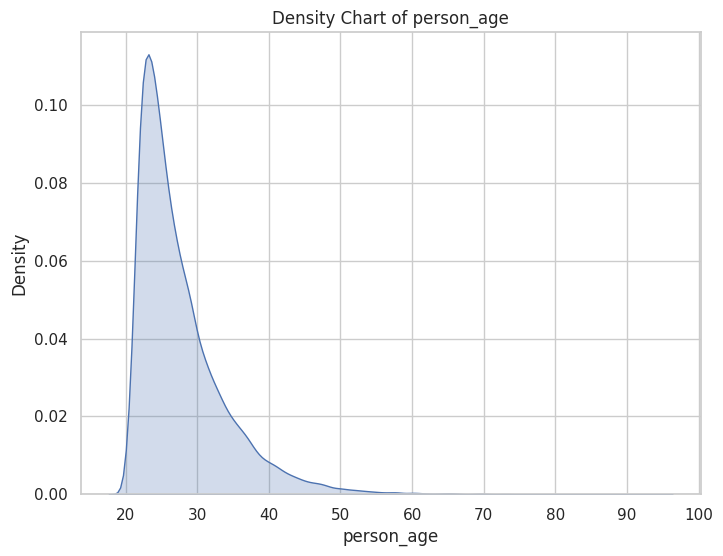

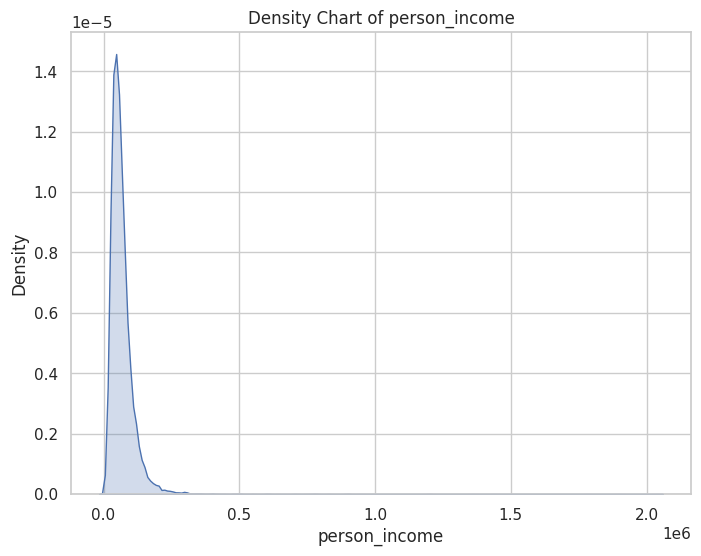

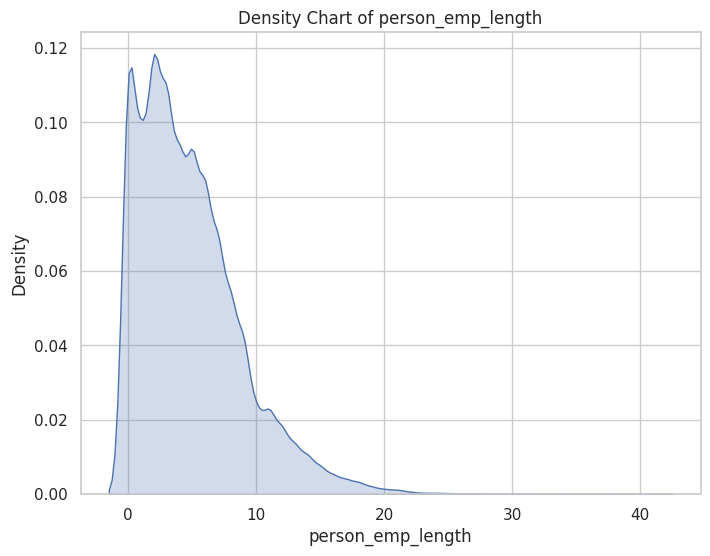

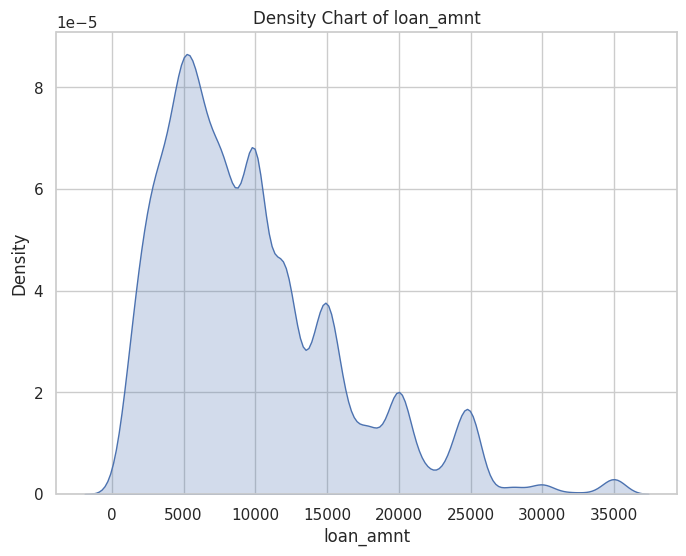

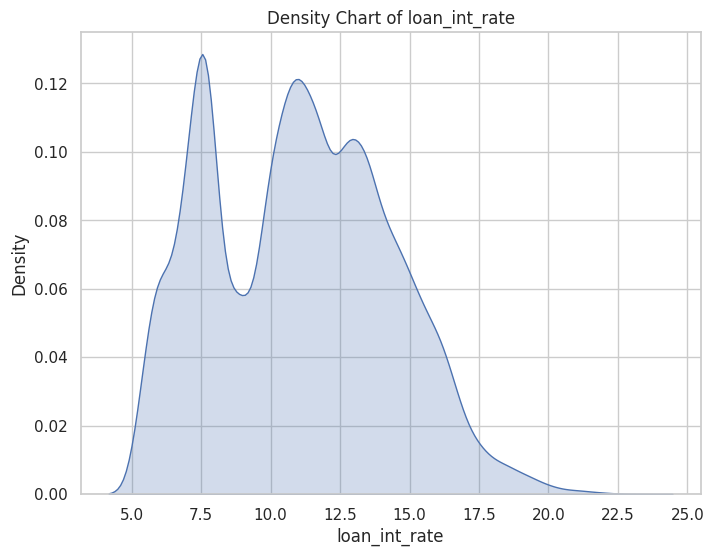

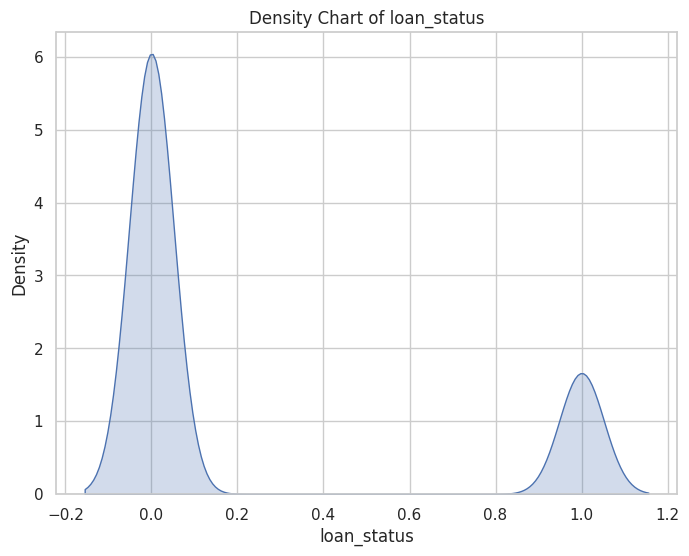

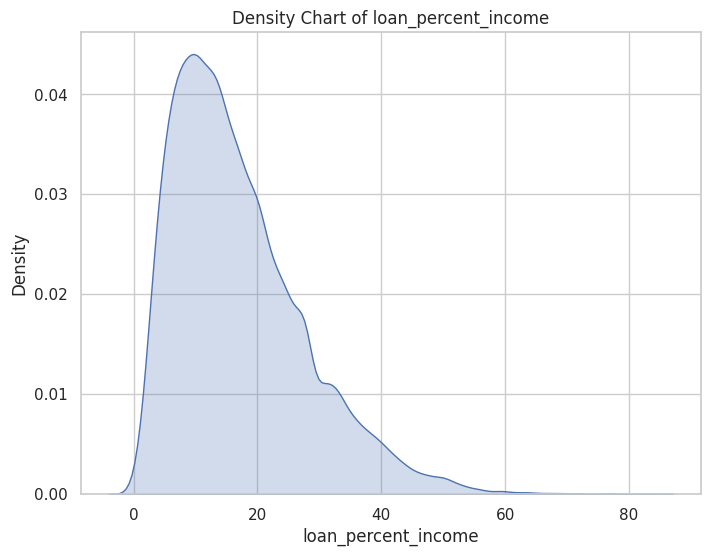

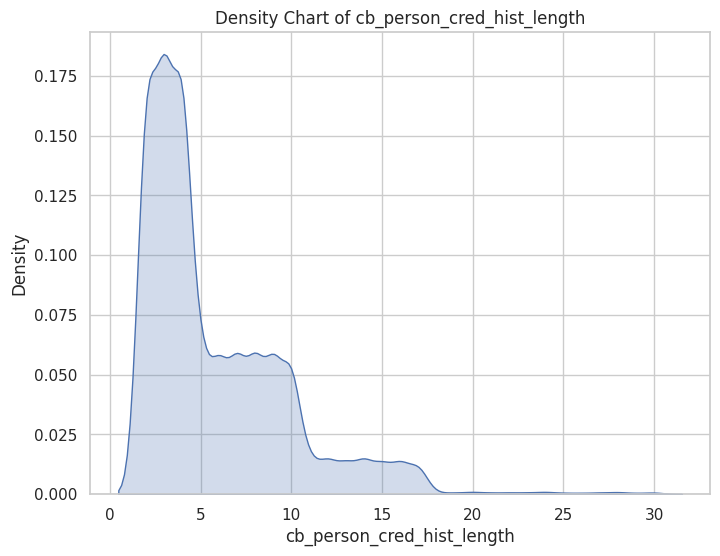

In [200]:
# List of columns to visualize
columns_to_visualize = [
    'person_age', 'person_income', 'person_home_ownership',
    'person_emp_length', 'loan_intent', 'loan_grade',
    'loan_amnt', 'loan_int_rate', 'loan_status',
    'loan_percent_income', 'cb_person_default_on_file',
    'cb_person_cred_hist_length'
]

# Visualize each column
for column in columns_to_visualize:
    # For numerical variables
    if data.select(column).dtypes[0][1] != 'string':
        # Convert column data to pandas DataFrame
        column_data = data.select(column).toPandas()
        # Plot density chart using seaborn
        plt.figure(figsize=(8, 6))
        sns.kdeplot(data=column_data[column], fill=True)
        plt.title(f'Density Chart of {column}')
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.show()

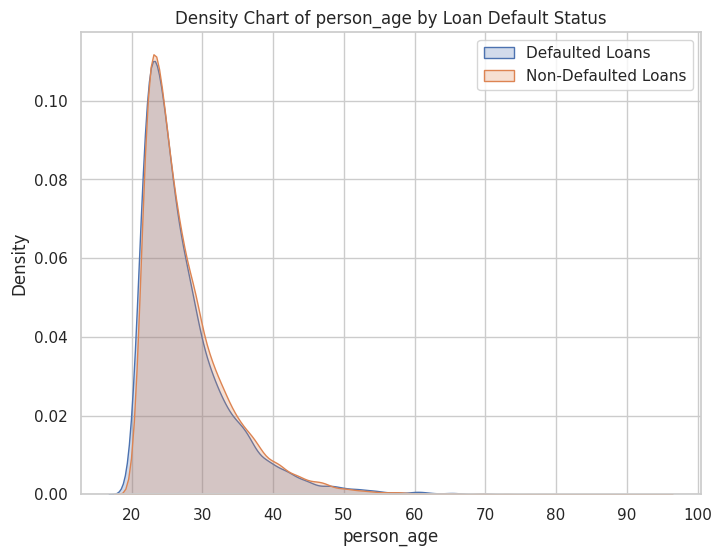

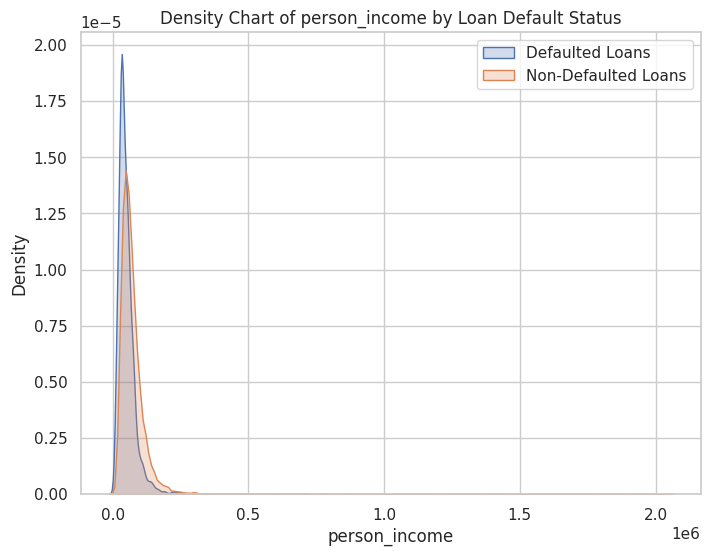

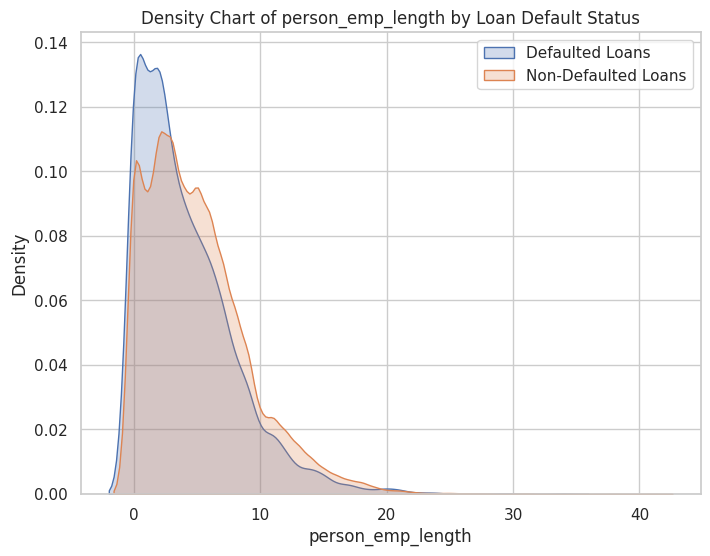

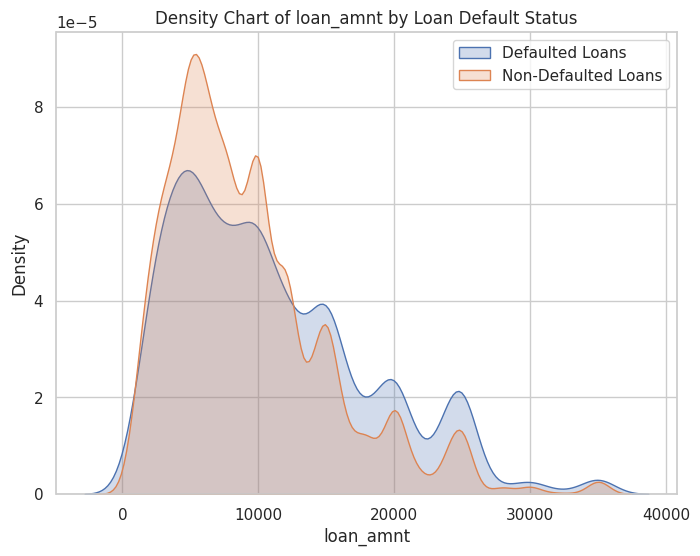

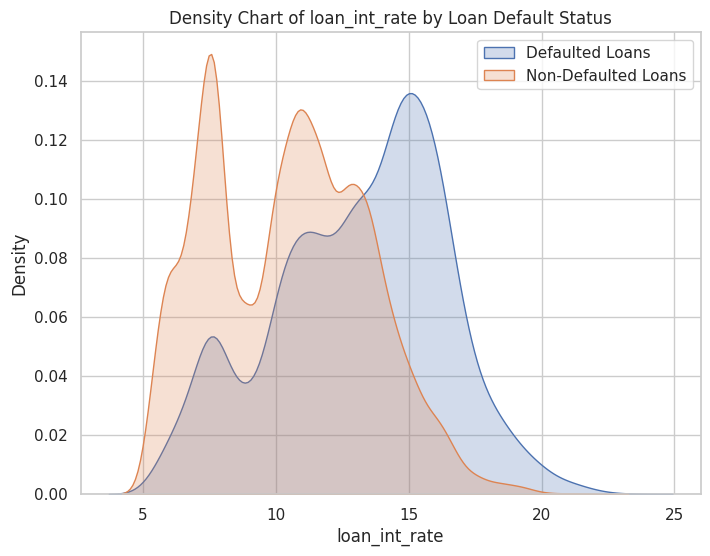

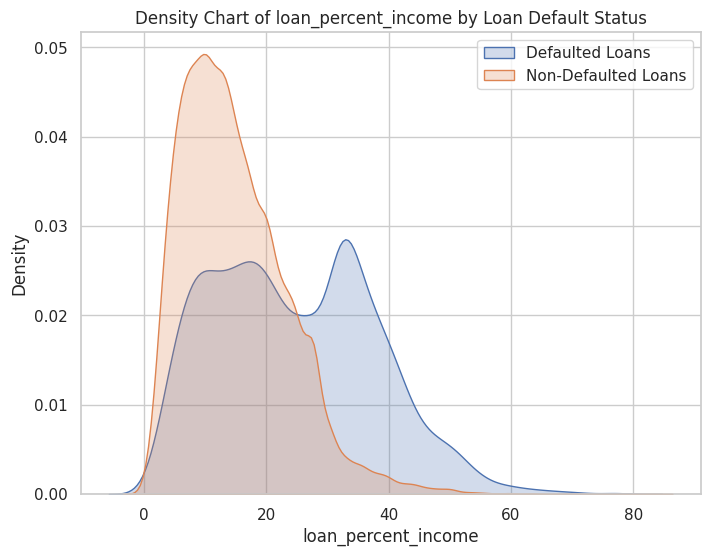

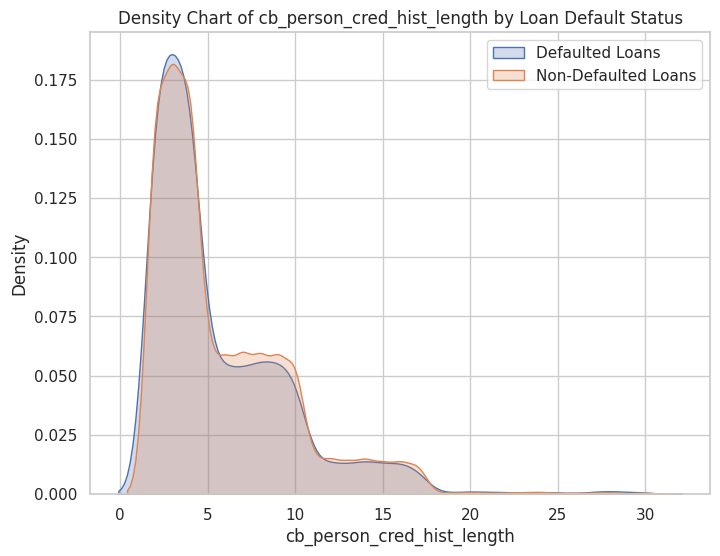

In [201]:
# List of numerical columns to visualize
numerical_columns = [
    'person_age', 'person_income', 'person_emp_length',
    'loan_amnt', 'loan_int_rate', 'loan_percent_income',
    'cb_person_cred_hist_length'
]

# Filter DataFrame for defaulted loans
defaulted_df = data.filter(data['loan_status'] == 1)

# Filter DataFrame for non-defaulted loans
non_defaulted_df = data.filter(data['loan_status'] == 0)

# Visualize density chart for each numerical column by loan default status
for column in numerical_columns:
    # Convert column data to pandas DataFrame
    default_column_data = defaulted_df.select(column).toPandas()
    non_default_column_data = non_defaulted_df.select(column).toPandas()

    # Plot density charts using seaborn
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=default_column_data[column], fill=True, label='Defaulted Loans')
    sns.kdeplot(data=non_default_column_data[column], fill=True, label='Non-Defaulted Loans')
    plt.title(f'Density Chart of {column} by Loan Default Status')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [202]:
# Import necessary modules
from pyspark.sql.functions import col

# Group by 'loan_status' column and count occurrences
loan_status_counts = data.groupBy('loan_status').count()

# Show unique values and their counts
loan_status_counts.show()


+-----------+-----+
|loan_status|count|
+-----------+-----+
|          1| 6825|
|          0|24854|
+-----------+-----+



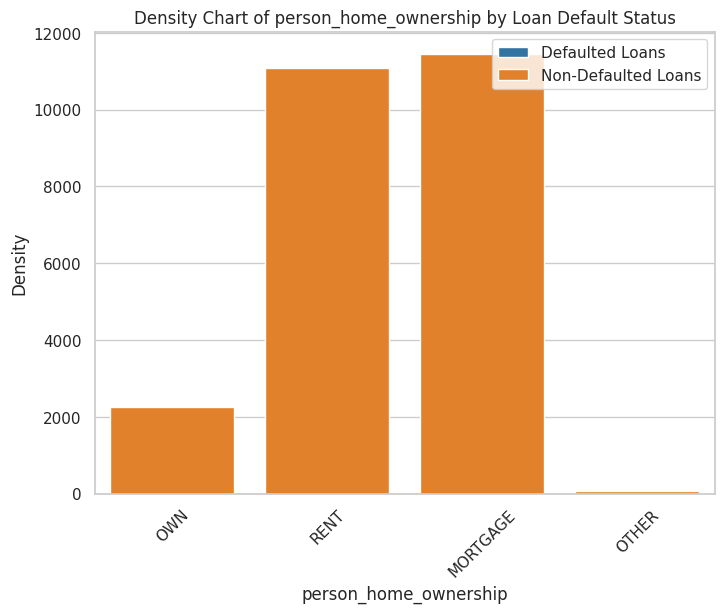

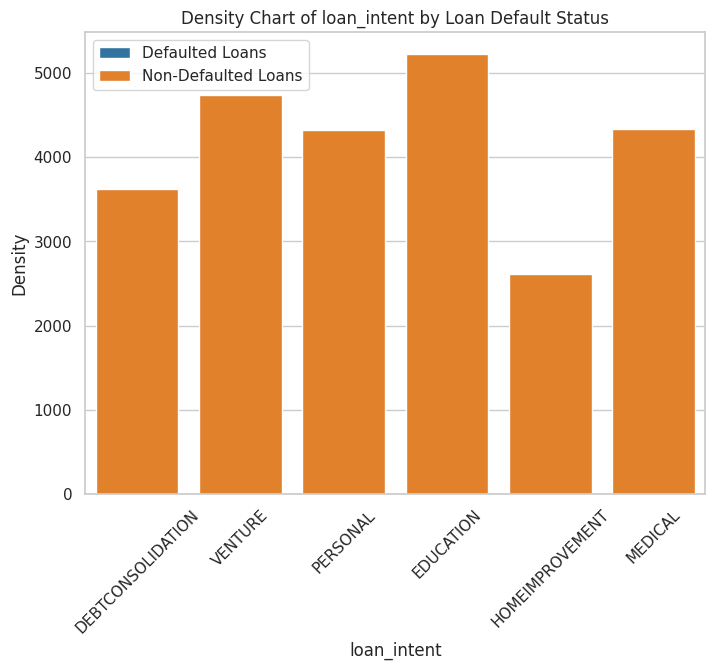

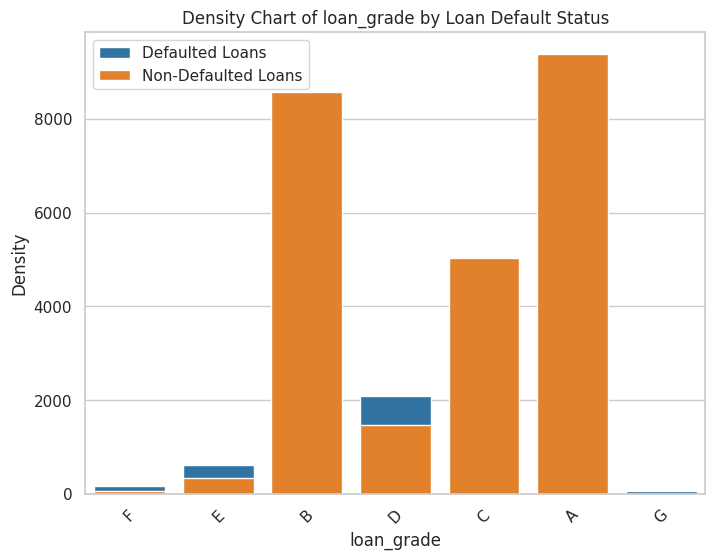

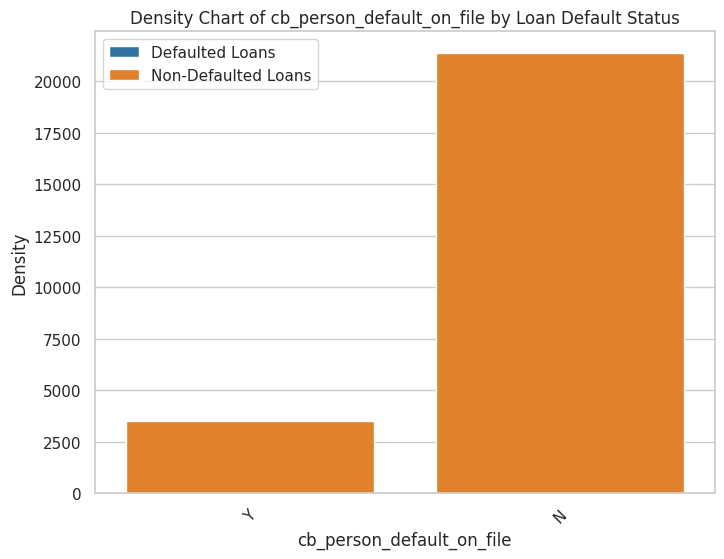

In [203]:
# List of categorical columns to visualize
categorical_columns = [
     'person_home_ownership',
    'loan_intent', 'loan_grade',
     'cb_person_default_on_file'
]

# Filter DataFrame for defaulted loans
defaulted_df = data.filter(data['loan_status'] == 1)

# Filter DataFrame for non-defaulted loans
non_defaulted_df = data.filter(data['loan_status'] == 0)

# Define colors for defaulted and non-defaulted loans
colors = ["#1f77b4", "#ff7f0e"]  # Blue for defaulted, Orange for non-defaulted

# Visualize density chart for each categorical column by loan default status
for column in categorical_columns:
    # Group by the categorical column and count occurrences for defaulted loans
    default_grouped = defaulted_df.groupBy(column).count().toPandas()
    # Group by the categorical column and count occurrences for non-defaulted loans
    non_default_grouped = non_defaulted_df.groupBy(column).count().toPandas()

    # Plot density charts using seaborn
    plt.figure(figsize=(8, 6))
    # Plot bars for defaulted loans
    sns.barplot(x=column, y='count', data=default_grouped, color=colors[0], label='Defaulted Loans')
    # Plot bars for non-defaulted loans
    sns.barplot(x=column, y='count', data=non_default_grouped, color=colors[1], label='Non-Defaulted Loans')
    plt.title(f'Density Chart of {column} by Loan Default Status')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

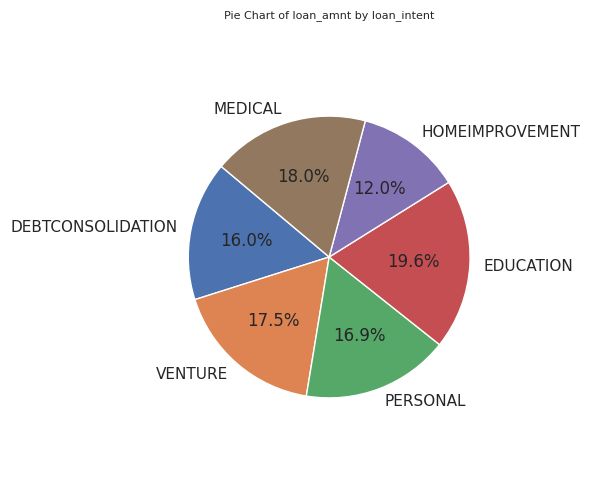

In [204]:
import matplotlib.pyplot as plt

# Assuming 'category_column' is your categorical variable and 'numerical_column' is your numerical variable
category_column = 'loan_intent'
numerical_column = 'loan_amnt'

# Aggregate numerical variable based on the categories in the categorical variable
aggregated_data = data.groupBy(category_column).agg({'loan_amnt': 'sum'})

# Convert the aggregated data to Pandas DataFrame for plotting
aggregated_data_pandas = aggregated_data.toPandas()

# Plot the pie chart
plt.figure(figsize=(4, 6))  # Adjust size
plt.pie(aggregated_data_pandas['sum(loan_amnt)'], labels=aggregated_data_pandas[category_column], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(f'Pie Chart of {numerical_column} by {category_column}', fontsize=8)  # Adjust title font size
plt.tick_params(labelsize=10)  # Adjust tick label font size
plt.show()



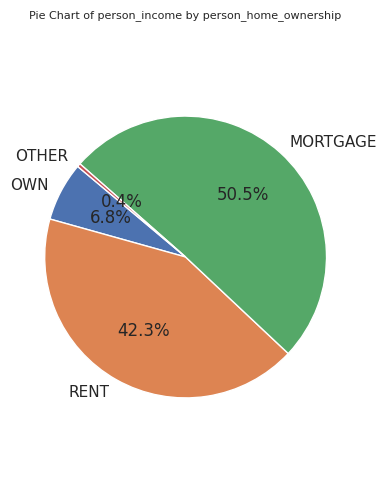

In [205]:
import matplotlib.pyplot as plt

# Assuming 'category_column' is your categorical variable and 'numerical_column' is your numerical variable
category_column = 'person_home_ownership'
numerical_column = 'person_income'

# Aggregate numerical variable based on the categories in the categorical variable
aggregated_data = data.groupBy(category_column).agg({'person_income': 'sum'})

# Convert the aggregated data to Pandas DataFrame for plotting
aggregated_data_pandas = aggregated_data.toPandas()

# Plot the pie chart
plt.figure(figsize=(4, 6))  # Adjust size
plt.pie(aggregated_data_pandas['sum(person_income)'], labels=aggregated_data_pandas[category_column], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(f'Pie Chart of {numerical_column} by {category_column}', fontsize=8)  # Adjust title font size
plt.tick_params(labelsize=10)  # Adjust tick label font size
plt.show()

In [206]:
data.count()

31679

###### The total records are 32581 and now after processing and removing the irregular data its turned out to be 31679 records in Data Frame

In [207]:
# Find duplicate rows
duplicate_rows = data.subtract(data.dropDuplicates())

# Show the duplicate rows
duplicate_rows.show()

+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|person_age|person_income|person_home_ownership|person_emp_length|loan_intent|loan_grade|loan_amnt|loan_int_rate|loan_status|loan_percent_income|cb_person_default_on_file|cb_person_cred_hist_length|
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+



No duplicated records are found

In [208]:
tot = data.count()

In [209]:
res = tot *30/100

In [210]:
res

9503.7

In [211]:
# Check for missing values
missing_values = data.select([sum(col(cols[0]).isNull().cast("int")).alias(cols[0]) for cols in data.dtypes ])

In [212]:
try:
    missing_values.show()
except Exception as e:
    print("Error occured", e)

+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|person_age|person_income|person_home_ownership|person_emp_length|loan_intent|loan_grade|loan_amnt|loan_int_rate|loan_status|loan_percent_income|cb_person_default_on_file|cb_person_cred_hist_length|
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|         0|            0|                    0|                0|          0|         0|        0|         3047|          0|                  0|                        0|                         0|
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+



In [213]:
# Find the count of missing values for each column
missing_count_per_column = data.select([sum(col(column).isNull().cast("int")).alias(column + "_missing_count") for column in data.columns])

print("Print count values of missing data for each column")
# Show the DataFrame with missing values counts
missing_count_per_column.show()


Print count values of missing data for each column
+------------------------+---------------------------+-----------------------------------+-------------------------------+-------------------------+------------------------+-----------------------+---------------------------+-------------------------+---------------------------------+---------------------------------------+----------------------------------------+
|person_age_missing_count|person_income_missing_count|person_home_ownership_missing_count|person_emp_length_missing_count|loan_intent_missing_count|loan_grade_missing_count|loan_amnt_missing_count|loan_int_rate_missing_count|loan_status_missing_count|loan_percent_income_missing_count|cb_person_default_on_file_missing_count|cb_person_cred_hist_length_missing_count|
+------------------------+---------------------------+-----------------------------------+-------------------------------+-------------------------+------------------------+-----------------------+------------------

##### The missing data which are missing are seems to be less than 30% of the total records

Mode Values

In [214]:
for target_column in data.dtypes:
  if  target_column[1] == 'string':
    mode_result = data.groupBy(target_column[0]).agg({"*": "count"}).withColumnRenamed("count(1)", "count").sort(desc("count")).collect()
    mode_value = mode_result[0][target_column[0]]
    print(f"Mode value for '{target_column[0]}': {mode_value}")

Mode value for 'person_home_ownership': RENT
Mode value for 'loan_intent': EDUCATION
Mode value for 'loan_grade': A
Mode value for 'cb_person_default_on_file': N


In [215]:
type(data)

pyspark.sql.dataframe.DataFrame

Mode value for 'person_home_ownership': RENT


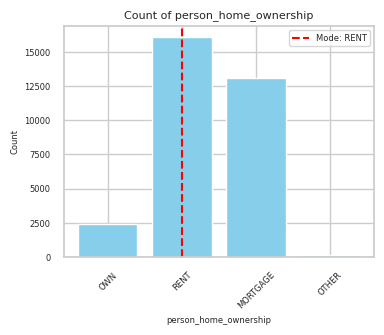

Mode value for 'loan_intent': EDUCATION


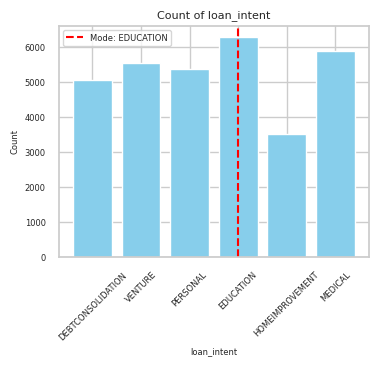

Mode value for 'loan_grade': A


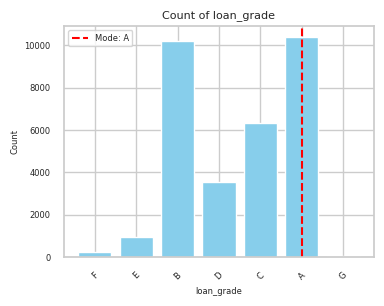

Mode value for 'cb_person_default_on_file': N


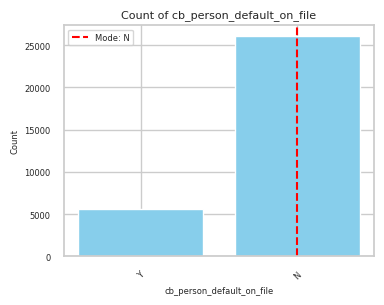

In [216]:
import matplotlib.pyplot as plt
from scipy import stats

# Define the categorical columns
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Function to calculate mode value for a column
def calculate_mode(column):
    mode_value = data.groupBy(column).count().orderBy('count', ascending=False).first()[column]
    return mode_value

# Function to create and display histogram with mode value annotation
def visualize_with_mode(column, mode_value):
    # Group by the column and count occurrences
    grouped_data = data.groupBy(column).count().toPandas()

    # Plot the histogram
    plt.figure(figsize=(4, 3))  # Half of the original size
    plt.bar(grouped_data[column], grouped_data['count'], color='skyblue')
    plt.title(f'Count of {column}', fontsize=8)  # Half of the original size
    plt.xlabel(column, fontsize=6)  # Half of the original size
    plt.ylabel('Count', fontsize=6)  # Half of the original size

    # Annotate mode value on the plot
    plt.axvline(x=mode_value, color='red', linestyle='--', label=f'Mode: {mode_value}')
    plt.legend(fontsize=6)  # Half of the original size

    plt.xticks(rotation=45, fontsize=6)  # Rotate x-axis labels and reduce font size
    plt.yticks(fontsize=6)  # Reduce font size for y-axis labels
    plt.show()

# Calculate and display mode value for each categorical column
for column in categorical_columns:
    mode_value = calculate_mode(column)
    print(f"Mode value for '{column}': {mode_value}")
    visualize_with_mode(column, mode_value)



**converting pyspark dataframe into new pandas dataframe**

In [217]:
#converting pyspark dataframe into new pandas dataframe
pandas_df = data.toPandas()

In [218]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in pandas_df.columns[pandas_df.dtypes == 'object']:
    pandas_df[column] = label_encoder.fit_transform(pandas_df[column])

In [219]:
pandas_df = pd.get_dummies(pandas_df)

In [220]:
# List of numerical columns to visualize
numerical_columns = [
    'person_age', 'person_income', 'person_emp_length',
    'loan_amnt', 'loan_int_rate', 'loan_percent_income',
    'cb_person_cred_hist_length'
]

In [221]:
import pandas as pd

# Assuming 'df' is your existing DataFrame
# List of numerical columns to visualize
numerical_columns = [
    'person_age', 'person_income', 'person_emp_length',
    'loan_amnt', 'loan_int_rate', 'loan_percent_income',
    'cb_person_cred_hist_length'
]

# Select numerical columns from the DataFrame
numerical_df = pandas_df[numerical_columns]

# Display the new DataFrame
print(numerical_df)


       person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0              21           9600                  5       1000             92   
1              25           9600                  1       5500            141   
2              23          65500                  4      35000            217   
3              24          54400                  8      35000            186   
4              21           9900                  2       2500             15   
...           ...            ...                ...        ...            ...   
31674          57          53000                  1       5800            149   
31675          54         120000                  4      17625             21   
31676          65          76000                  3      35000             87   
31677          56         150000                  5      15000            100   
31678          66          42000                  2       6475             60   

       loan_percent_income 

In [222]:
correlation_matrix = numerical_df.corr()

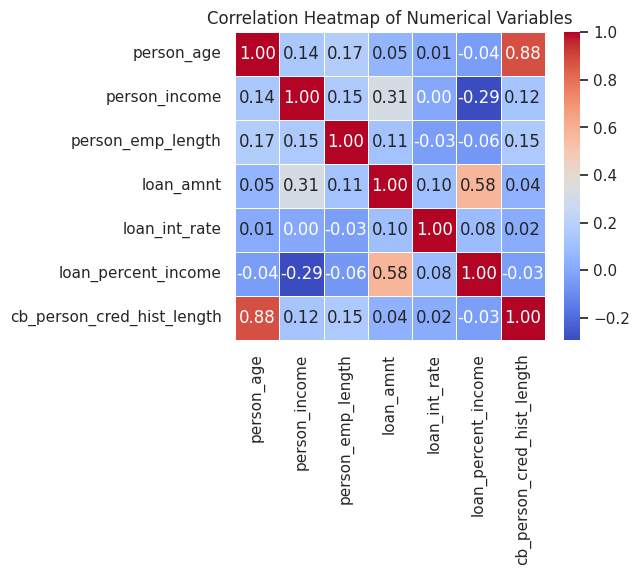

In [223]:
# Plot correlation heatmap with a smaller size
plt.figure(figsize=(5, 4))  # Adjust the figsize as per your preference
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()




#### heat map and correlation analysis

###### A heatmap is a type of graphical data representation where colours are used to represent the values in a matrix. It is a tool for visualising a phenomenon's intensity, size, or the relationship between two variables. A heatmap is frequently used in correlation analysis to show the variable correlation matrix.

From data to df

In [224]:
df = data

In [225]:
df.head(1)

[Row(person_age=21, person_income=9600, person_home_ownership='OWN', person_emp_length=5, loan_intent='EDUCATION', loan_grade='B', loan_amnt=1000, loan_int_rate=Decimal('11.14'), loan_status=0, loan_percent_income=10, cb_person_default_on_file='N', cb_person_cred_hist_length=2)]

#### Outlier Detection

###### A crucial stage in the preprocessing and analysis of data is outlier detection, which enhances data quality, model performance, and decision-making across a range of industries.Detecting outliers is critical for several tasks, including data cleaning, preprocessing, and improving the robustness of machine learning models.

In [226]:
pandas_df.dtypes

,0
person_age,int32
person_income,int32
person_home_ownership,int64
person_emp_length,int32
loan_intent,int64
loan_grade,int64
loan_amnt,int32
loan_int_rate,int64
loan_status,int32
loan_percent_income,int32


In [227]:
pandas_df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [228]:
pandas_df['person_home_ownership'].dtype

dtype('int64')

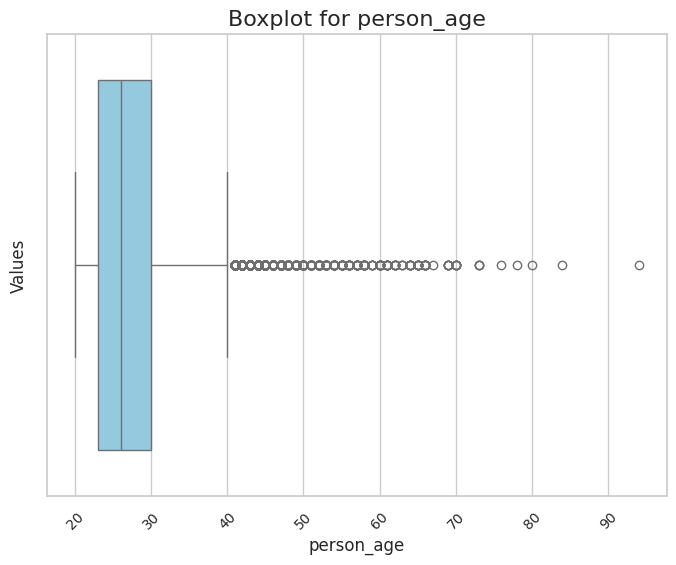

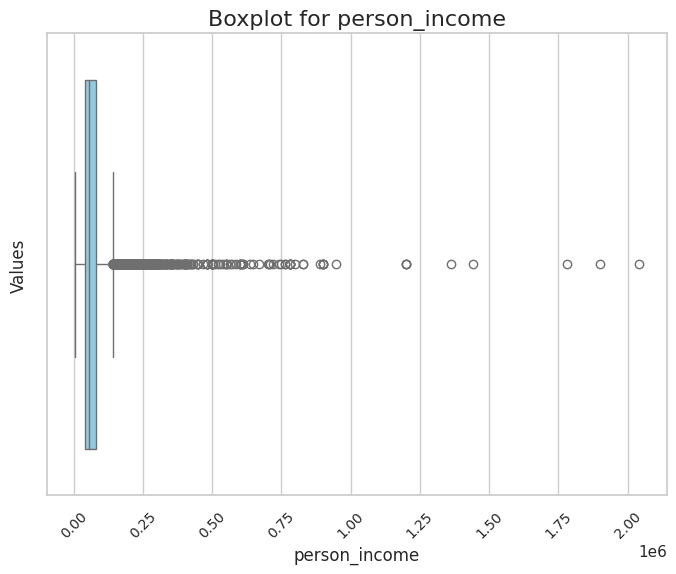

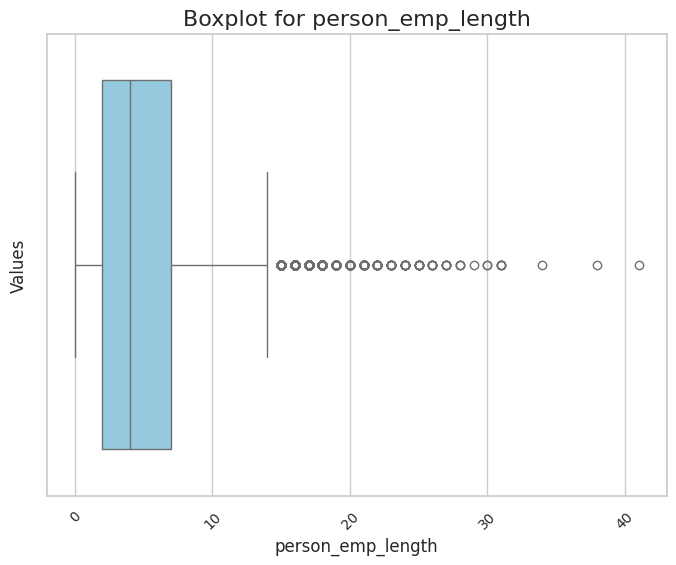

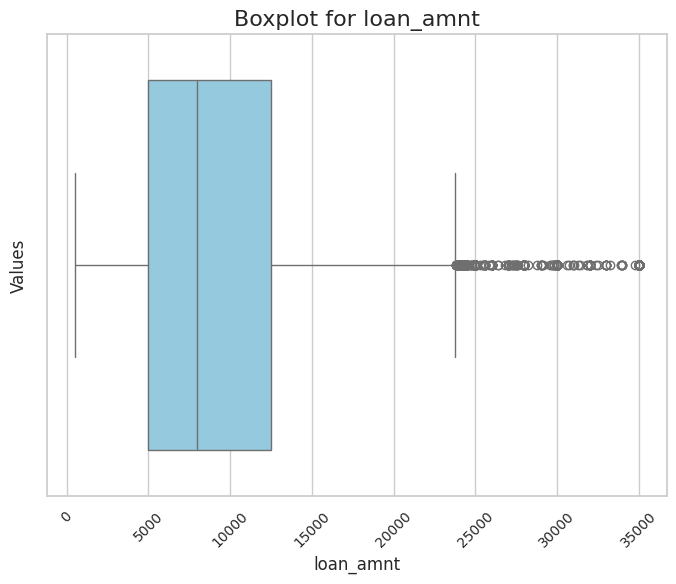

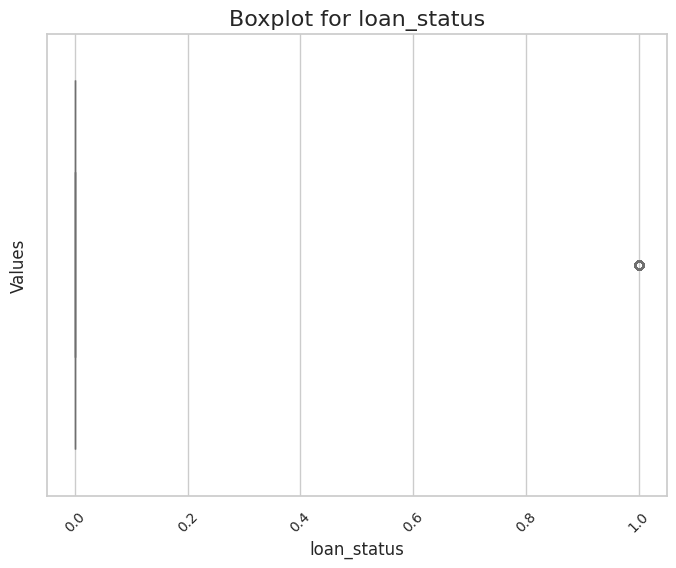

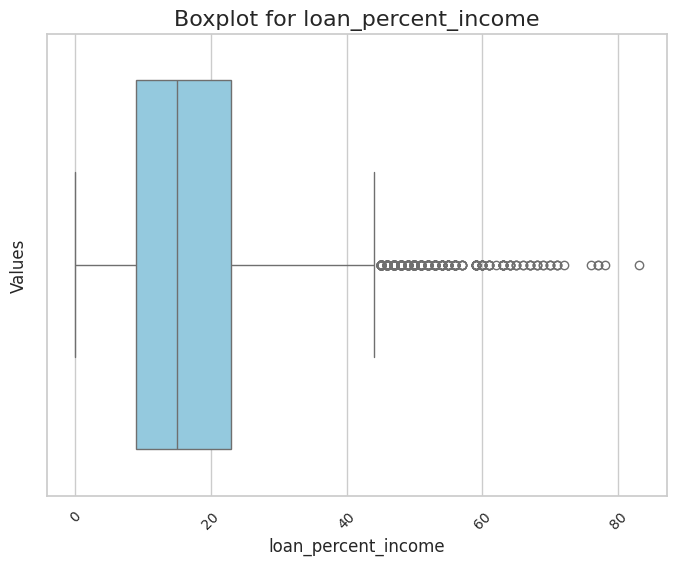

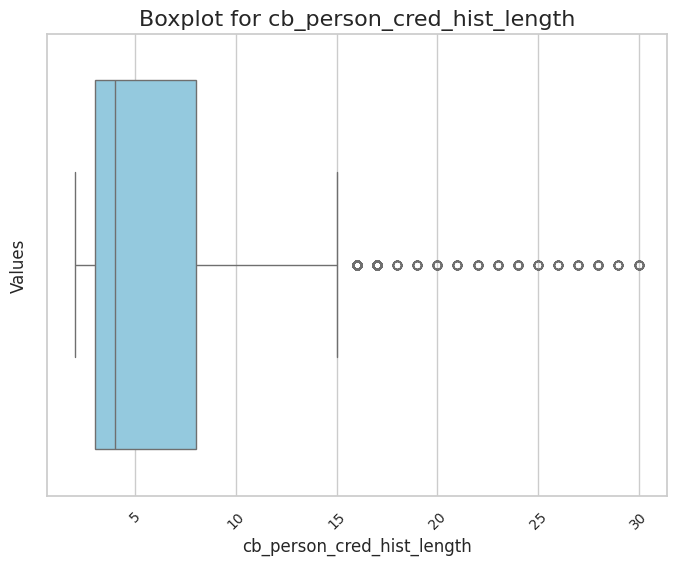

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through each numerical column and create a box plot
for x in pandas_df.columns:
    if pandas_df[x].dtype in ('int32', 'float32'):
        sns.set(style="whitegrid")  # Set plot style
        plt.figure(figsize=(8, 6))  # Set figure size
        sns.boxplot(x=pandas_df[x], color='skyblue', orient='v')  # Create box plot
        plt.title(f'Boxplot for {x}', fontsize=16)  # Set title
        plt.xlabel(x, fontsize=12)  # Set x-axis label
        plt.ylabel('Values', fontsize=12)  # Set y-axis label
        plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels and set font size
        plt.yticks(fontsize=10)  # Set y-axis tick label size
        plt.show()  # Show plot



##### The outliers are taken into keen consideration and removed from the data set because its a quite small portion of the entire ds

In [230]:
df.dtypes

[('person_age', 'int'),
 ('person_income', 'int'),
 ('person_home_ownership', 'string'),
 ('person_emp_length', 'int'),
 ('loan_intent', 'string'),
 ('loan_grade', 'string'),
 ('loan_amnt', 'int'),
 ('loan_int_rate', 'decimal(4,2)'),
 ('loan_status', 'int'),
 ('loan_percent_income', 'int'),
 ('cb_person_default_on_file', 'string'),
 ('cb_person_cred_hist_length', 'int')]

In [231]:
# Function to count outliers using IQR method for multiple columns
def count_outliers_iqr(data, columns):
    for column_name in columns:
      # Calculate Q1 and Q3 using the approxQuantile function
      quantiles = df.approxQuantile(column_name, [0.25, 0.75], 0.01)
      Q1 = int(quantiles[0])
      Q3 = int(quantiles[1])

      # Calculate the IQR
      IQR = Q3 - Q1

      # Define lower and upper bounds for outliers
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR

      # Find outliers count
      outliers_count = df.filter((col(column_name) < lower_bound) | (col(column_name) > upper_bound)).count()

      # Show the count of outliers
      print(f"Count of outliers in {column_name}: {outliers_count}")

# Specify the list of columns containing numerical data
numeric_columns = ['person_age', 'person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']

# Remove outliers using the IQR method for multiple columns
count_outliers_iqr(df, numeric_columns)


Count of outliers in person_age: 1455
Count of outliers in person_income: 1588
Count of outliers in person_emp_length: 851
Count of outliers in loan_amnt: 1727
Count of outliers in loan_int_rate: 6
Count of outliers in loan_percent_income: 614
Count of outliers in cb_person_cred_hist_length: 1115


In [232]:
from pyspark.sql.functions import col, mean, when

columns = ['person_age', 'person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']

# Define Z-score threshold for identifying outliers (e.g., 3.0)
z_score_threshold = 3.0

# Impute outliers with median values for each numeric column
for column_name in columns:
    # Calculate median using approxQuantile
    median_value = df.approxQuantile(column_name, [0.5], 0.01)[0]
    print(median_value,column_name)

    # Calculate Z-score for each data point
    df_outliers = df.withColumn("z_score", (col(column_name) - median_value) / median_value)

    # Impute outliers with the median value
    df = df_outliers.withColumn(column_name,
                               when(col("z_score").cast("double").rlike(f"-{z_score_threshold}|{z_score_threshold}"),
                                    median_value).otherwise(col(column_name)))


26.0 person_age
55840.0 person_income
4.0 person_emp_length
8000.0 loan_amnt
10.99 loan_int_rate
15.0 loan_percent_income
4.0 cb_person_cred_hist_length


In [233]:
count_outliers_iqr(df, numeric_columns)

Count of outliers in person_age: 1455
Count of outliers in person_income: 1895
Count of outliers in person_emp_length: 686
Count of outliers in loan_amnt: 1715
Count of outliers in loan_int_rate: 385
Count of outliers in loan_percent_income: 600
Count of outliers in cb_person_cred_hist_length: 675


###### Imputing the values using median to avoid impact from outliers in the data for numerical variables.

In [234]:
df.count()

31679

In [235]:
df.dtypes

[('person_age', 'double'),
 ('person_income', 'double'),
 ('person_home_ownership', 'string'),
 ('person_emp_length', 'double'),
 ('loan_intent', 'string'),
 ('loan_grade', 'string'),
 ('loan_amnt', 'double'),
 ('loan_int_rate', 'double'),
 ('loan_status', 'int'),
 ('loan_percent_income', 'double'),
 ('cb_person_default_on_file', 'string'),
 ('cb_person_cred_hist_length', 'double'),
 ('z_score', 'double')]

In [236]:
df = df.withColumn("person_age", col("person_age").cast("int"))

In [237]:
df.dtypes

[('person_age', 'int'),
 ('person_income', 'double'),
 ('person_home_ownership', 'string'),
 ('person_emp_length', 'double'),
 ('loan_intent', 'string'),
 ('loan_grade', 'string'),
 ('loan_amnt', 'double'),
 ('loan_int_rate', 'double'),
 ('loan_status', 'int'),
 ('loan_percent_income', 'double'),
 ('cb_person_default_on_file', 'string'),
 ('cb_person_cred_hist_length', 'double'),
 ('z_score', 'double')]

In [238]:
df.head(1)

[Row(person_age=21, person_income=9600.0, person_home_ownership='OWN', person_emp_length=5.0, loan_intent='EDUCATION', loan_grade='B', loan_amnt=1000.0, loan_int_rate=11.14, loan_status=0, loan_percent_income=10.0, cb_person_default_on_file='N', cb_person_cred_hist_length=2.0, z_score=-0.5)]

In [239]:
###removing z score column from data frame

In [240]:
df=df.drop("z_score")

In [241]:
# sample fraction of rows to extract
sample_fraction = 0.5

# Extract a random sample of rows
random_sample_df = df.sample(fraction=sample_fraction, seed=42)  # You can set the seed for reproducibility

# Show the DataFrame with random or mixed rows
random_sample_df.show()


+----------+-------------+---------------------+-----------------+-----------------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|person_age|person_income|person_home_ownership|person_emp_length|      loan_intent|loan_grade|loan_amnt|loan_int_rate|loan_status|loan_percent_income|cb_person_default_on_file|cb_person_cred_hist_length|
+----------+-------------+---------------------+-----------------+-----------------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|        24|      54400.0|                 RENT|              8.0|          MEDICAL|         C|  35000.0|        14.27|          1|               55.0|                        Y|                       4.0|
|        24|      83000.0|                 RENT|              8.0|         PERSONAL|         A|  35000.0|          8.9|          1|               42.0|                        N|   

In [242]:
df_pandas = df.toPandas()

In [243]:
df_pandas['loan_status'].value_counts()

,count
loan_status,
0,24854
1,6825


Denpendent variable loan status are biased have to handle before modeling.

In [244]:
df_pandas.dtypes

,0
person_age,int32
person_income,float64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,float64
loan_int_rate,float64
loan_status,int32
loan_percent_income,float64


In [245]:
df.describe().show()

+-------+-----------------+-----------------+---------------------+-----------------+-----------------+----------+-----------------+------------------+-------------------+-------------------+-------------------------+--------------------------+
|summary|       person_age|    person_income|person_home_ownership|person_emp_length|      loan_intent|loan_grade|        loan_amnt|     loan_int_rate|        loan_status|loan_percent_income|cb_person_default_on_file|cb_person_cred_hist_length|
+-------+-----------------+-----------------+---------------------+-----------------+-----------------+----------+-----------------+------------------+-------------------+-------------------+-------------------------+--------------------------+
|  count|            31679|            31679|                31679|            31679|            31679|     31679|            31679|             28632|              31679|              31679|                    31679|                     31679|
|   mean|27.73067331

Imputing median values for the missing values

In [246]:
# Fill missing values in the 'person_emp_length' column with the median
## Calculate median using approxQuantile
median_value = df.approxQuantile("person_emp_length", [0.5], 0.01)[0]
df_null_filled = df.fillna(median_value, subset=["person_emp_length"])

In [247]:
# Fill missing values in the 'loan_int_rate' column with the median
median_value = df.approxQuantile("loan_int_rate", [0.5], 0.01)[0]
df_null_filled = df_null_filled.fillna(median_value, subset=["loan_int_rate"])

In [248]:
df_null_filled

DataFrame[person_age: int, person_income: double, person_home_ownership: string, person_emp_length: double, loan_intent: string, loan_grade: string, loan_amnt: double, loan_int_rate: double, loan_status: int, loan_percent_income: double, cb_person_default_on_file: string, cb_person_cred_hist_length: double]

In [249]:
# Check for missing values
missing_values = df_null_filled.select([sum(col(cols).isNull().cast("int")).alias(cols) for cols in df_null_filled.columns])

In [250]:
missing_values.show()

+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|person_age|person_income|person_home_ownership|person_emp_length|loan_intent|loan_grade|loan_amnt|loan_int_rate|loan_status|loan_percent_income|cb_person_default_on_file|cb_person_cred_hist_length|
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+
|         0|            0|                    0|                0|          0|         0|        0|            0|          0|                  0|                        0|                         0|
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+



In [251]:
df= df_null_filled

##### Finally, Imputation done for the both attributes is confirmed by the cross-examination , then the dataframe name changed from df null filled to df as normal

In [252]:
type(df)

pyspark.sql.dataframe.DataFrame

#### The type of dataframe is sql dataframe

In [253]:
df.count()

31679

Droping duplicate

In [254]:
df = df.dropDuplicates()

In [255]:
# Find duplicates based on all columns
duplicates_all = df.groupBy(df.columns).count().where("count > 1")

# Display all duplicates
print("All Duplicates:")
duplicates_all.show(truncate=False)

duplicates_all.count()

All Duplicates:
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+-----+
|person_age|person_income|person_home_ownership|person_emp_length|loan_intent|loan_grade|loan_amnt|loan_int_rate|loan_status|loan_percent_income|cb_person_default_on_file|cb_person_cred_hist_length|count|
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+-----+
+----------+-------------+---------------------+-----------------+-----------+----------+---------+-------------+-----------+-------------------+-------------------------+--------------------------+-----+



0

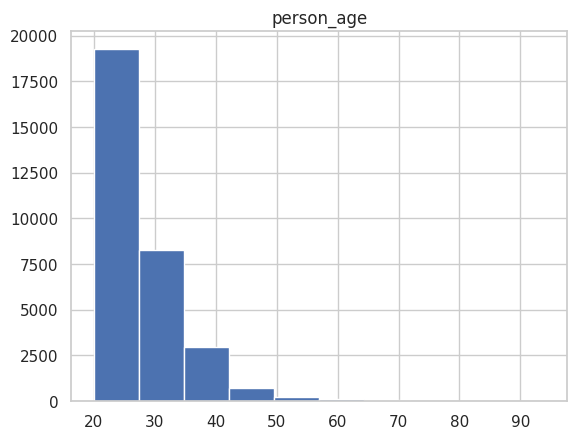

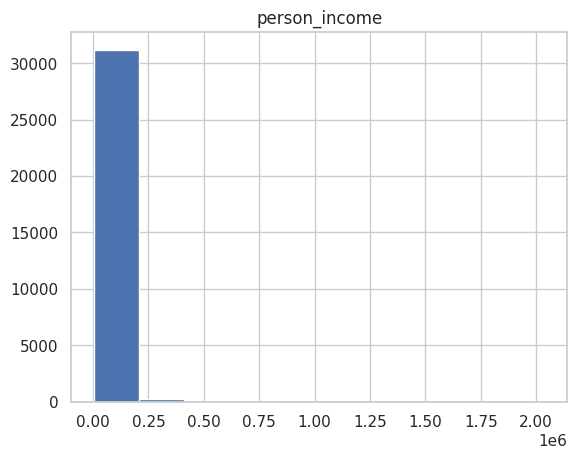

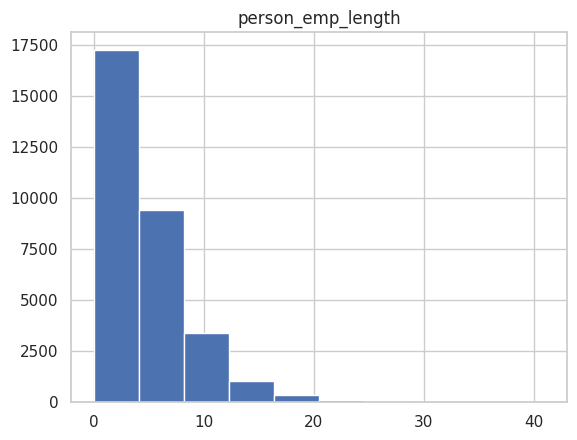

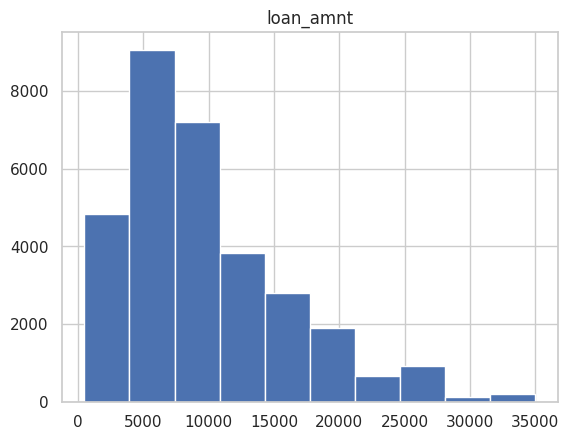

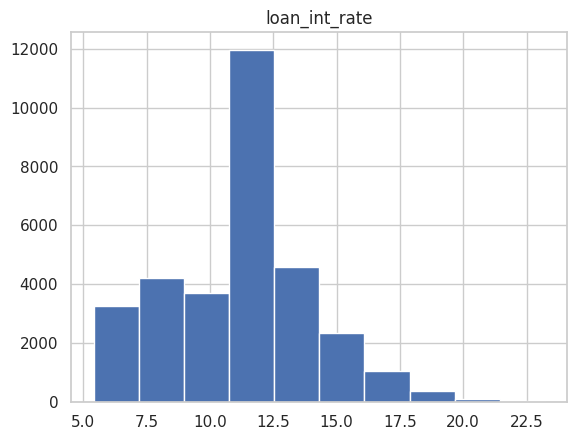

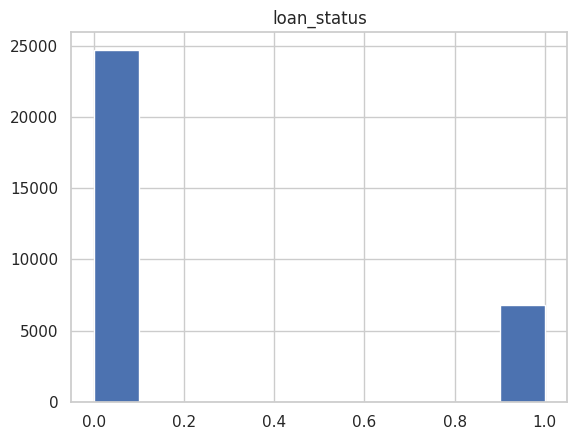

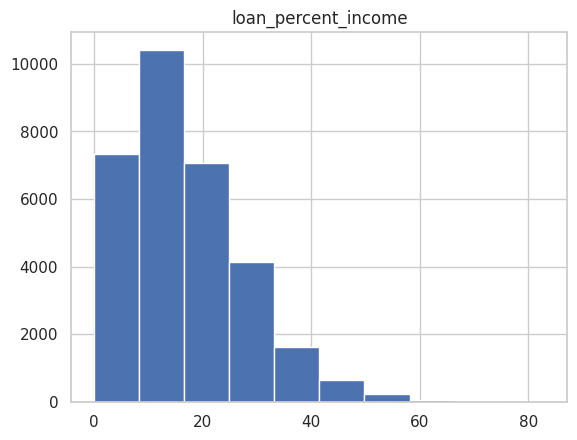

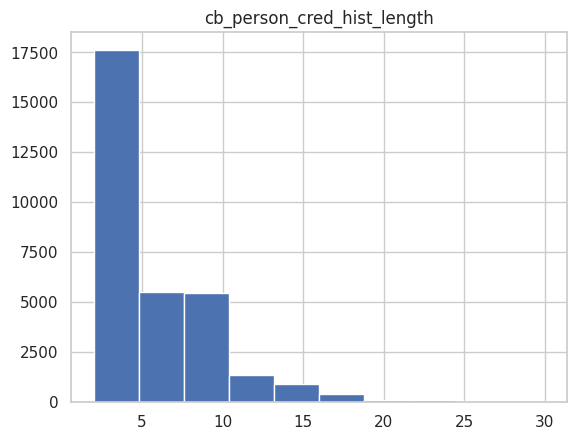

In [256]:
# Visualization
for n in df.dtypes:
    if n[1] != 'string':
        df.select(n[0]).toPandas().hist()
        plt.show()

In [257]:
type(df)

pyspark.sql.dataframe.DataFrame

In [258]:
df.dtypes

[('person_age', 'int'),
 ('person_income', 'double'),
 ('person_home_ownership', 'string'),
 ('person_emp_length', 'double'),
 ('loan_intent', 'string'),
 ('loan_grade', 'string'),
 ('loan_amnt', 'double'),
 ('loan_int_rate', 'double'),
 ('loan_status', 'int'),
 ('loan_percent_income', 'double'),
 ('cb_person_default_on_file', 'string'),
 ('cb_person_cred_hist_length', 'double')]

###### Given that this imbalanced data should be addressed before moving on with additional modelling, there is a significant likelihood that the model will become non-robust and rely too much on one category with a high mass. This is because the dependent variable is biased.

In [259]:
df.head(1)

[Row(person_age=21, person_income=9600.0, person_home_ownership='OWN', person_emp_length=5.0, loan_intent='EDUCATION', loan_grade='B', loan_amnt=1000.0, loan_int_rate=11.14, loan_status=0, loan_percent_income=10.0, cb_person_default_on_file='N', cb_person_cred_hist_length=2.0)]

In [260]:
df

DataFrame[person_age: int, person_income: double, person_home_ownership: string, person_emp_length: double, loan_intent: string, loan_grade: string, loan_amnt: double, loan_int_rate: double, loan_status: int, loan_percent_income: double, cb_person_default_on_file: string, cb_person_cred_hist_length: double]

In [261]:
df.head(5)

[Row(person_age=24, person_income=192000.0, person_home_ownership='RENT', person_emp_length=0.0, loan_intent='MEDICAL', loan_grade='C', loan_amnt=22000.0, loan_int_rate=10.99, loan_status=0, loan_percent_income=11.0, cb_person_default_on_file='Y', cb_person_cred_hist_length=2.0),
 Row(person_age=23, person_income=150000.0, person_home_ownership='RENT', person_emp_length=0.0, loan_intent='EDUCATION', loan_grade='A', loan_amnt=24000.0, loan_int_rate=7.49, loan_status=0, loan_percent_income=16.0, cb_person_default_on_file='N', cb_person_cred_hist_length=4.0),
 Row(person_age=23, person_income=138000.0, person_home_ownership='RENT', person_emp_length=7.0, loan_intent='DEBTCONSOLIDATION', loan_grade='D', loan_amnt=24000.0, loan_int_rate=16.0, loan_status=1, loan_percent_income=17.0, cb_person_default_on_file='Y', cb_person_cred_hist_length=2.0),
 Row(person_age=26, person_income=148000.0, person_home_ownership='RENT', person_emp_length=1.0, loan_intent='DEBTCONSOLIDATION', loan_grade='E', l

In [262]:
df.dtypes

[('person_age', 'int'),
 ('person_income', 'double'),
 ('person_home_ownership', 'string'),
 ('person_emp_length', 'double'),
 ('loan_intent', 'string'),
 ('loan_grade', 'string'),
 ('loan_amnt', 'double'),
 ('loan_int_rate', 'double'),
 ('loan_status', 'int'),
 ('loan_percent_income', 'double'),
 ('cb_person_default_on_file', 'string'),
 ('cb_person_cred_hist_length', 'double')]

In [263]:
from pyspark.sql.functions import col

value_counts = df.groupBy("loan_status").count().orderBy(col("count").desc())

value_counts.show()


+-----------+-----+
|loan_status|count|
+-----------+-----+
|          0|24713|
|          1| 6807|
+-----------+-----+



In [264]:
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StandardScaler

# Assuming df is your original DataFrame and 'loan_status' is the binary target variable
# Identify minority and majority classes
minority_df = df.filter(col("loan_status") == 1)
majority_df = df.filter(col("loan_status") == 0)

# Calculate the ratio to balance the dataset
ratio = majority_df.count() / minority_df.count()

# Oversample the minority class
oversampled_minority_df = minority_df.sample(withReplacement=True, fraction=ratio, seed=42)

# Combine the majority class with the oversampled minority class
balanced_df = majority_df.unionAll(oversampled_minority_df)

In [265]:
from pyspark.sql.functions import col

value_counts = balanced_df.groupBy("loan_status").count().orderBy(col("count").desc())

value_counts.show()

+-----------+-----+
|loan_status|count|
+-----------+-----+
|          1|24936|
|          0|24713|
+-----------+-----+



In [266]:
# Split the balanced dataset (80% training, 20% testing)
(train_data, test_data) = balanced_df.randomSplit([0.8, 0.2], seed=42)

In [267]:
# Saving the train DataFrame to CSV
train_data.write.csv('train_data.csv',  mode='overwrite', header=True)

# Saving the test DataFrame to CSV
test_data.write.csv('test_data.csv',  mode='overwrite', header=True)


In [268]:
# Define stages of the pipeline
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index", handleInvalid="skip") for col in ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']]
encoder = OneHotEncoder(inputCols=[indexer.getOutputCol() for indexer in indexers], outputCols=["encoded_" + col for col in ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']])
assembler_encoded = VectorAssembler(inputCols=encoder.getOutputCols(), outputCol="encoded_features")

additional_features = ['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

# Additional feature vector
assembler_additional = VectorAssembler(inputCols=additional_features, outputCol="additional_features")

# StandardScaler
scaler = StandardScaler(inputCol='additional_features', outputCol='scaled_features', withStd=True, withMean=True)


# Combine encoded features and additional features
assembler_combined = VectorAssembler(inputCols=["encoded_features", "scaled_features"], outputCol="features")



**BASE model: RF**

In [269]:
# Model
rf = RandomForestClassifier(labelCol="loan_status", featuresCol="features", seed=42)

# Create a Pipeline with all the stages
pipeline_rf = Pipeline(stages=indexers + [ encoder, assembler_encoded,assembler_additional,scaler, assembler_combined, rf])

# Fit the pipeline to the balanced training data
RF_BaseLoanDefaultModel = pipeline_rf.fit(train_data)

**Listing Files in google drive**

In [270]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [271]:
import os
from pathlib import Path

In [272]:
#folder_path = '/content/drive/My Drive/Models/models'


In [273]:
#model_save_path = f"{folder_path}/RF_BaseLoanDefaultModel"
#RF_BaseLoanDefaultModel.write().overwrite().save(model_save_path)

In [274]:
# List contents of the folder to verify
#!ls -lrt "{folder_path}"


In [ ]:
from pyspark.ml import PipelineModel
import os

folder_path = '/content/drive/My Drive/Models/models'

# List all files in the folder
files = os.listdir(folder_path)

# Load each model
loaded_models = {}
for file_name in files:
    # Check if the file is a model file (e.g., ends with ".model")
    #if file_name.endswith(".model"):
        # Extract model name from file name
        model_name = os.path.splitext(file_name)[0]
        # Load the model
        model = PipelineModel.load(os.path.join(folder_path, file_name))
        # Store the loaded model in a dictionary
        loaded_models[model_name] = model


In [ ]:
len(loaded_models)

In [ ]:
loaded_models

In [ ]:
for x in loaded_models:
  print(x)

In [ ]:
import pandas as pd
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

for model_name, model in loaded_models.items():
    print(f'\nTrain Prediction value of {model_name}')

    # Make predictions on the train data
    train_predictions = model.transform(train_data)

    # Initialize the evaluator
    evaluator = MulticlassClassificationEvaluator(labelCol='loan_status')

    # Define the metrics to be calculated
    metrics = {
        "Accuracy": evaluator.evaluate(train_predictions, {evaluator.metricName: "accuracy"}),
        "Weighted Precision": evaluator.evaluate(train_predictions, {evaluator.metricName: "weightedPrecision"}),
        "Weighted Recall": evaluator.evaluate(train_predictions, {evaluator.metricName: "weightedRecall"}),
        "Weighted F1 Score": evaluator.evaluate(train_predictions, {evaluator.metricName: "weightedFMeasure"})
    }

    # Convert the metrics to a Pandas DataFrame
    train_metrics_df = pd.DataFrame(list(metrics.items()), columns=["Metric", "Value"])
    train_metrics_df["Value"] = train_metrics_df["Value"].round(3)

    # Print the table
    print("\tTrain Data Metrics")
    print(train_metrics_df)

    print(f'\nTest Prediction value of {model_name}')

    # Make predictions on the test data
    test_predictions = model.transform(test_data)

    # Define the metrics to be calculated
    metrics = {
        "Accuracy": evaluator.evaluate(test_predictions, {evaluator.metricName: "accuracy"}),
        "Weighted Precision": evaluator.evaluate(test_predictions, {evaluator.metricName: "weightedPrecision"}),
        "Weighted Recall": evaluator.evaluate(test_predictions, {evaluator.metricName: "weightedRecall"}),
        "Weighted F1 Score": evaluator.evaluate(test_predictions, {evaluator.metricName: "weightedFMeasure"})
    }

    # Convert the metrics to a Pandas DataFrame
    test_metrics_df = pd.DataFrame(list(metrics.items()), columns=["Metric", "Value"])
    test_metrics_df["Value"] = test_metrics_df["Value"].round(3)

    # Print the table
    print("\tTest Data Metrics")
    print(test_metrics_df)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from sklearn.metrics import roc_curve, auc

# Set font scale for seaborn plots
sns.set(font_scale=0.8)  # Adjust font scale as needed

for model_name, model in loaded_models.items():

  print(f'\nTest Prediction of {model_name}')

  # Make predictions on the train data
  test_predictions = model.transform(test_data)
  # Convert predictions to RDD for MulticlassMetrics
  predictions_rdd = test_predictions.select("prediction", "loan_status").rdd.map(lambda x: (float(x[0]), float(x[1])))

  # Compute confusion matrix
  metrics = MulticlassMetrics(predictions_rdd)
  confusion_matrix = metrics.confusionMatrix().toArray()

  # Plot confusion matrix
  plt.figure(figsize=(4, 3))
  sns.heatmap(confusion_matrix, annot=True, fmt=".0f", cmap="Blues", cbar=False)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")
  plt.show()

  # Extract probabilities and true labels
  # Ensure your model outputs a probability column; it usually contains probabilities for both classes
  probabilities = test_predictions.select("probability", "loan_status").rdd.map(lambda row: (row['probability'][1], float(row['loan_status']))).collect()
  prob_pd = pd.DataFrame(probabilities, columns=["probability", "label"])
  # Compute ROC curve and ROC area
  fpr, tpr, _ = roc_curve(prob_pd['label'], prob_pd['probability'])
  roc_auc = auc(fpr, tpr)

  # Plot ROC curve
  print(f'\nROC Curve of {model_name}')
  plt.figure(figsize=(4, 3))
  lw = 2  # Line width
  plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()



In [ ]:
import pandas as pd

# Initialize an empty list to store all metrics DataFrames
all_metrics_dfs = []

for model_name, model in loaded_models.items():
    # Make predictions on the train data
    train_predictions = model.transform(train_data)
    # Make predictions on the test data
    test_predictions = model.transform(test_data)

    # Define the metrics to be calculated for train data
    train_metrics = {
        "Model": model_name,
        "Dataset": "Train",
        "Accuracy": evaluator.evaluate(train_predictions, {evaluator.metricName: "accuracy"}),
        "Weighted Precision": evaluator.evaluate(train_predictions, {evaluator.metricName: "weightedPrecision"}),
        "Weighted Recall": evaluator.evaluate(train_predictions, {evaluator.metricName: "weightedRecall"}),
        "Weighted F1 Score": evaluator.evaluate(train_predictions, {evaluator.metricName: "weightedFMeasure"})
    }
    # Define the metrics to be calculated for test data
    test_metrics = {
        "Model": model_name,
        "Dataset": "Test",
        "Accuracy": evaluator.evaluate(test_predictions, {evaluator.metricName: "accuracy"}),
        "Weighted Precision": evaluator.evaluate(test_predictions, {evaluator.metricName: "weightedPrecision"}),
        "Weighted Recall": evaluator.evaluate(test_predictions, {evaluator.metricName: "weightedRecall"}),
        "Weighted F1 Score": evaluator.evaluate(test_predictions, {evaluator.metricName: "weightedFMeasure"})
    }

    # Convert the metrics to DataFrames
    train_metrics_df = pd.DataFrame([train_metrics])
    test_metrics_df = pd.DataFrame([test_metrics])

    # Append train and test metrics DataFrames to the list
    all_metrics_dfs.append(train_metrics_df)
    all_metrics_dfs.append(test_metrics_df)



In [ ]:
from IPython.display import display_html

# Concatenate all metrics DataFrames vertically
all_metrics_df = pd.concat(all_metrics_dfs, ignore_index=True)

# Reset index starting from 1
all_metrics_df.reset_index(drop=True, inplace=True)
all_metrics_df.index += 1

# Apply CSS styles
styled_all_metrics_df = all_metrics_df.style \
    .set_caption("Model Evaluation Metrics") \
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '16px')]},
        {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('font-size', '14px')]},
        {'selector': 'td', 'props': [('font-size', '14px')]}
    ]) \
    .bar(subset=["Accuracy", "Weighted Precision", "Weighted Recall", "Weighted F1 Score"], color='#CCFFFF')

# Convert styled DataFrame to HTML
styled_html = styled_all_metrics_df.to_html()
display_html(styled_html, raw=True)


In [ ]:
# List contents of the folder to verify
!ls -lrt "{folder_path}"
